# Project Description: 


<b>
Data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.
    
Data set for the Problem: Sparkling.csv and Rose.csv

# 1.Read the data as an appropriate Time Series data and plot the data.

In [1]:
#Import Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

In [2]:
#Import Libraries related to Timeseries
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

<b> Read Datasets

In [4]:
df_spark=pd.read_csv('Sparkling.csv',header=0,index_col=0,parse_dates =['YearMonth'])
#squeeze=True

In [5]:
df_spark.index

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '1994-10-01', '1994-11-01', '1994-12-01', '1995-01-01',
               '1995-02-01', '1995-03-01', '1995-04-01', '1995-05-01',
               '1995-06-01', '1995-07-01'],
              dtype='datetime64[ns]', name='YearMonth', length=187, freq=None)

In [6]:
df_spark.shape

(187, 1)

In [7]:
df_spark.head(2)

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591

In [8]:
print('TS Start Time:' , df_spark.index.min())
print('TS End Time:' , df_spark.index.max())

TS Start Time: 1980-01-01 00:00:00
TS End Time: 1995-07-01 00:00:00


<b> Plot Times Series

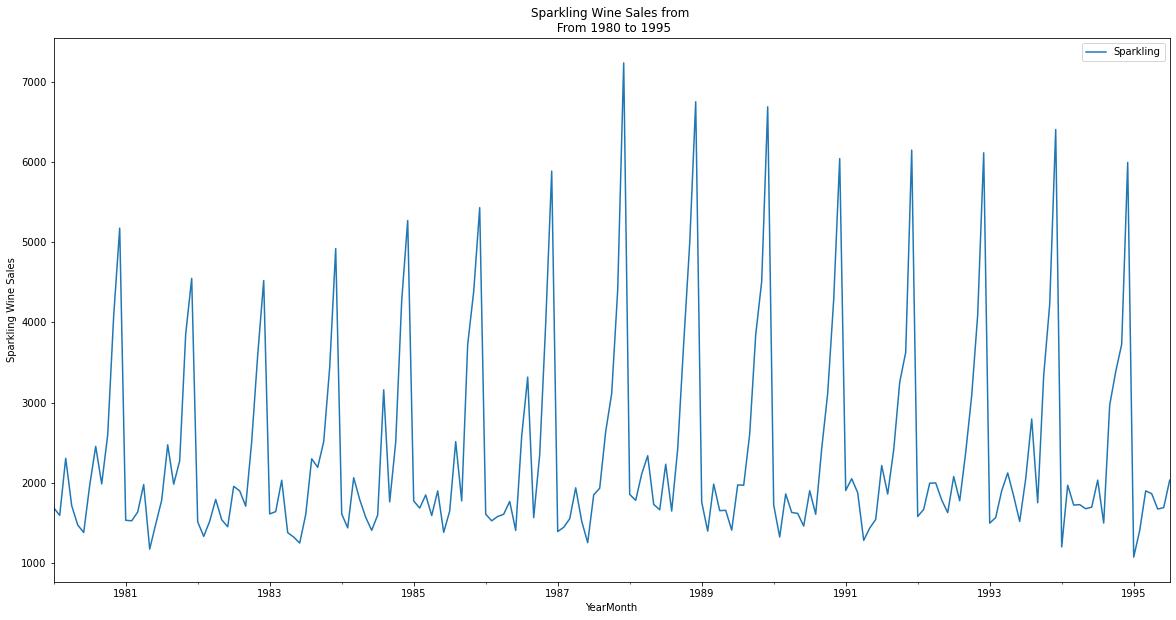

In [9]:
df_spark.plot(figsize=(20,10))
plt.ylabel('Sparkling Wine Sales')
plt.title('Sparkling Wine Sales from \n From 1980 to 1995')
plt.show()

<b> Conclusion : By visualization we can say time series is having same fluctuations over the years and maximum spike on sales we can identify between 1987 to 1989 range and also we can observe some seasonality.

# 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition

<b> Check 5 point summary of each Wine Sales

In [10]:
df_spark.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

<b>Null Check on dataset

In [11]:
print('Sparkling:',df_spark.isnull().sum())

Sparkling: Sparkling    0
dtype: int64


<b>Plot a year on year boxplot for Wine Sales.

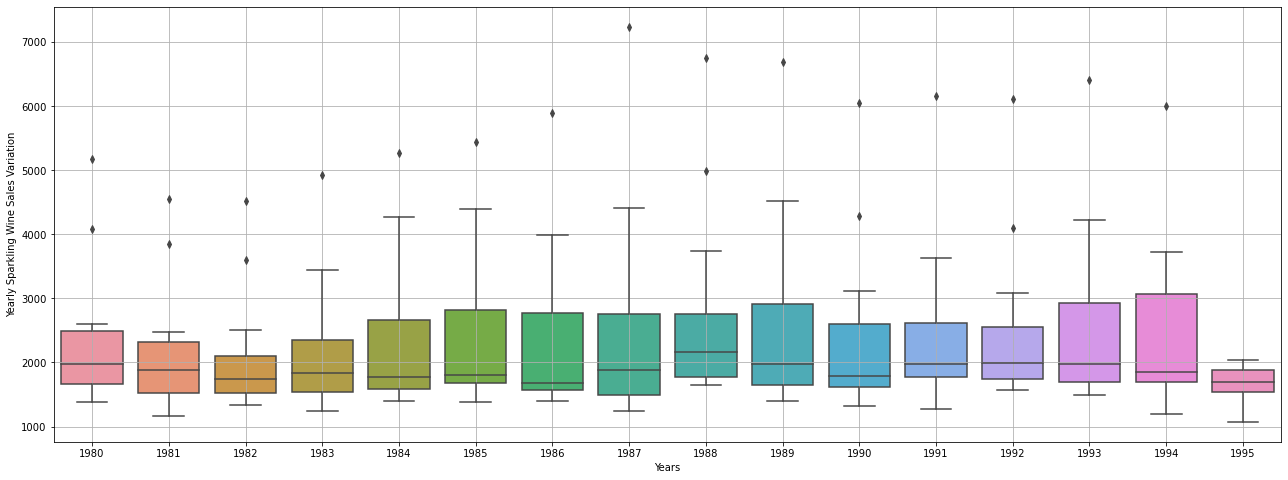

In [12]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df_spark.index.year, df_spark.Sparkling, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Sparkling Wine Sales Variation');

<b>Plot a monthly boxplot for Wine Sales taking all the years into account.

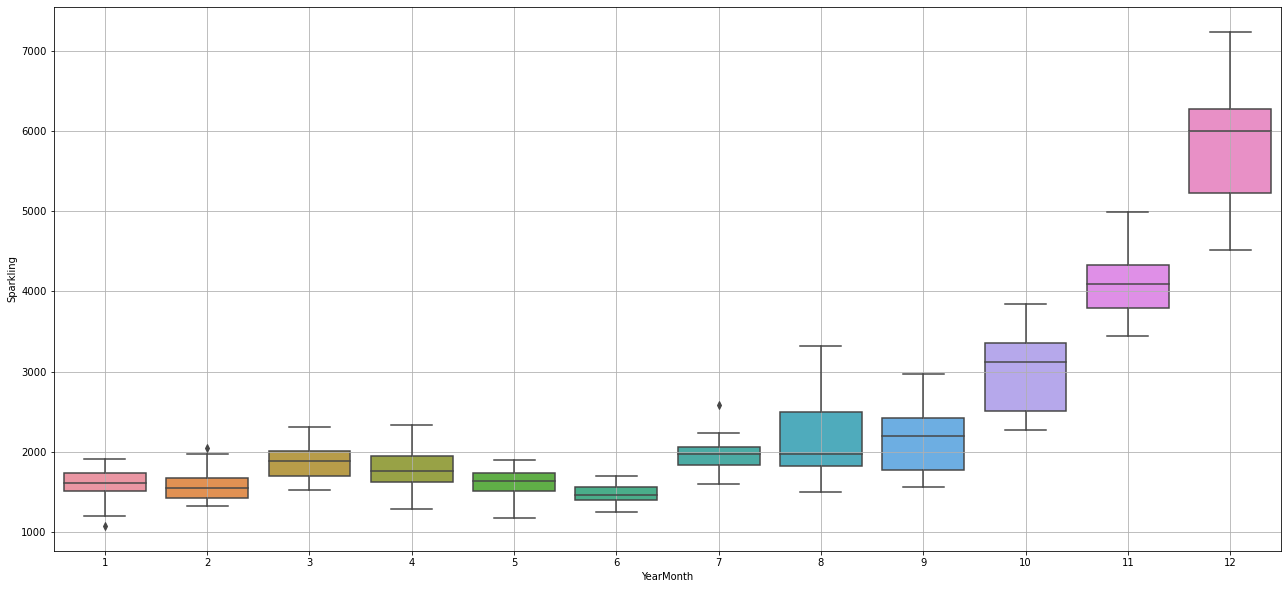

In [13]:
fig, ax = plt.subplots(figsize=(22,10))
sns.boxplot(df_spark.index.month, df_spark.Sparkling, ax=ax,whis=1.5)
plt.grid();

<b>Plot a monthplot of the give Time Series.

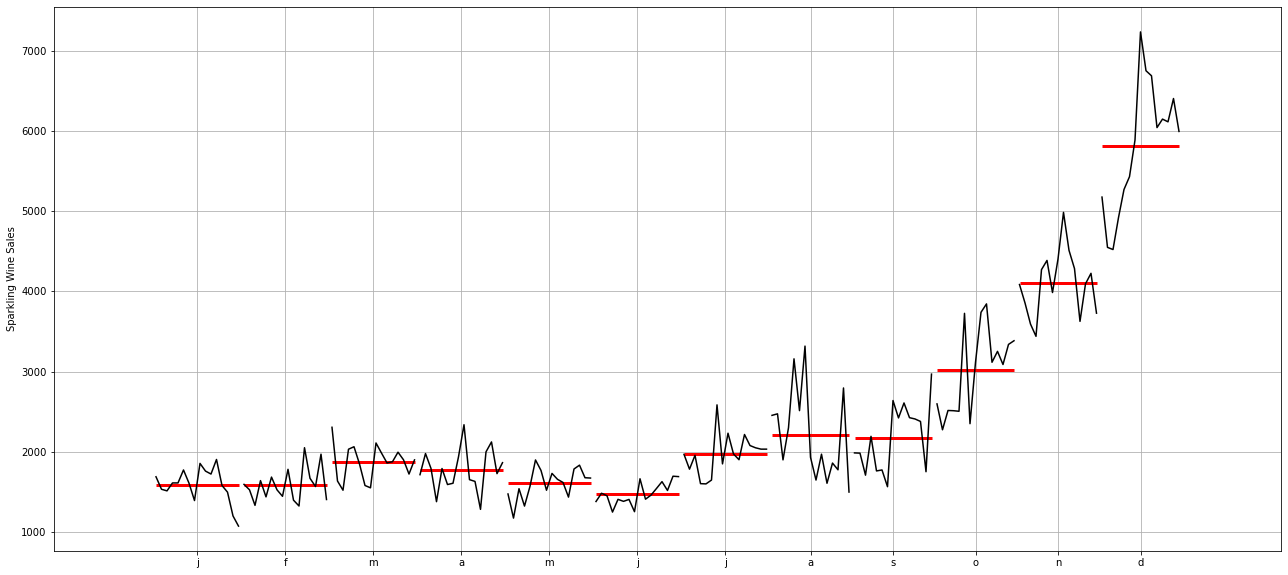

In [14]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,10))

month_plot(df_spark,ylabel='Sparkling Wine Sales',ax=ax)
plt.grid();

<b>Plot the Time Series according to different months for different years.

In [15]:
df_spark.head(1)

Sparkling
YearMonth            
1980-01-01       1686

In [16]:
yearly_sales_across_months_spark = pd.pivot_table(df_spark, values ='Sparkling', columns = df_spark.index.month, 
                                        index = df_spark.index.year)

yearly_sales_across_months_spark

YearMonth      1       2       3       4       5       6       7       8   \
YearMonth                                                                   
1980       1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981       1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982       1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983       1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984       1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985       1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986       1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987       1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988       1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989       1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990       1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991       1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992       1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993       1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994       1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995       1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

YearMonth      9       10      11      12  
YearMonth                                  
1980       1984.0  2596.0  4087.0  5179.0  
1981       1981.0  2273.0  3857.0  4551.0  
1982       1706.0  2514.0  3593.0  4524.0  
1983       2191.0  2511.0  3440.0  4923.0  
1984       1759.0  2504.0  4273.0  5274.0  
1985       1771.0  3727.0  4388.0  5434.0  
1986       1562.0  2349.0  3987.0  5891.0  
1987       2638.0  3114.0  4405.0  7242.0  
1988       2421.0  3740.0  4988.0  6757.0  
1989       2608.0  3845.0  4514.0  6694.0  
1990       2424.0  3116.0  4286.0  6047.0  
1991       2408.0  3252.0  3627.0  6153.0  
1992       2377.0  3088.0  4096.0  6119.0  
1993       1749.0  3339.0  4227.0  6410.0  
1994       2968.0  3385.0  3729.0  5999.0  
1995          NaN     NaN     NaN     NaN

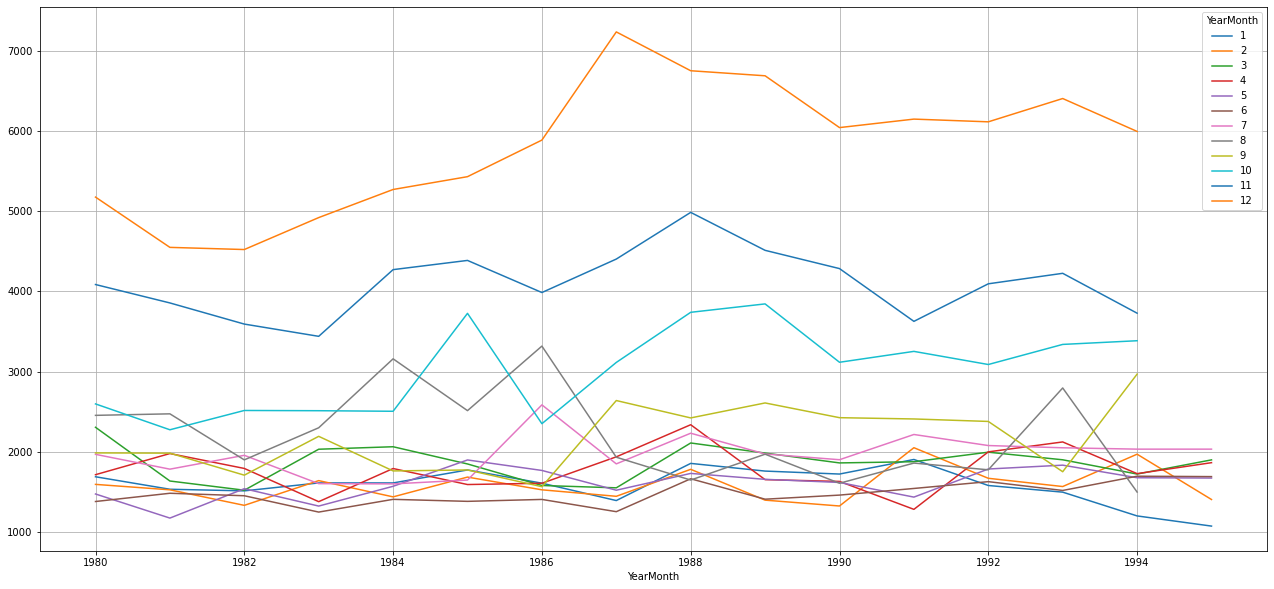

In [17]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months_spark.plot(ax=ax)
plt.grid();

<b>Read this monthly data into a quarterly and yearly format. Compare the Time Series plot and draw inferences.

<b>Yearly Plot

In [18]:
df_yearly_sum_spark = df_spark.resample('A').sum()
print(df_yearly_sum_spark.head(3))
df_yearly_mean_spark = df_spark.resample('A').mean()
print(df_yearly_mean_spark.head(3))

            Sparkling
YearMonth            
1980-12-31      28406
1981-12-31      26227
1982-12-31      25321
              Sparkling
YearMonth              
1980-12-31  2367.166667
1981-12-31  2185.583333
1982-12-31  2110.083333


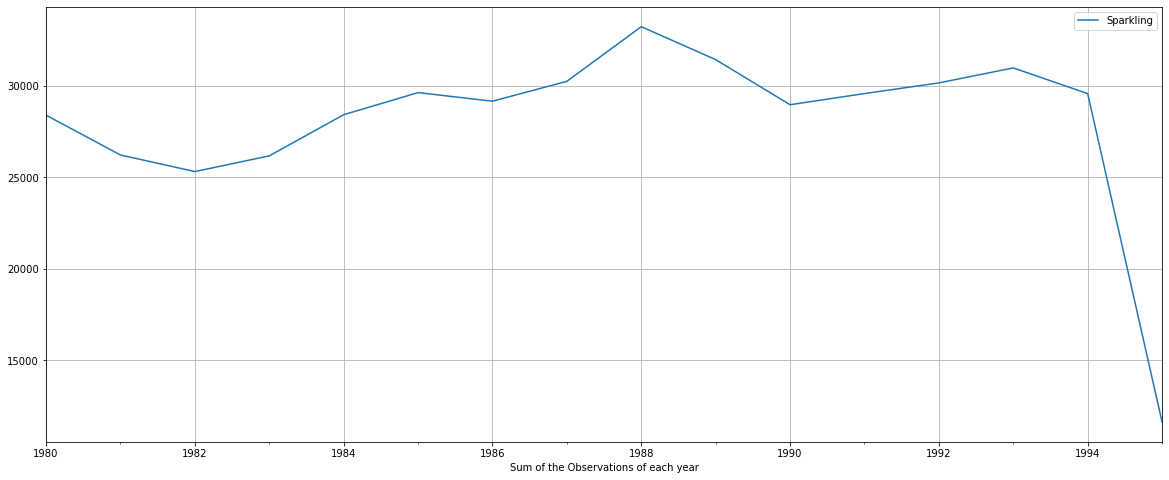

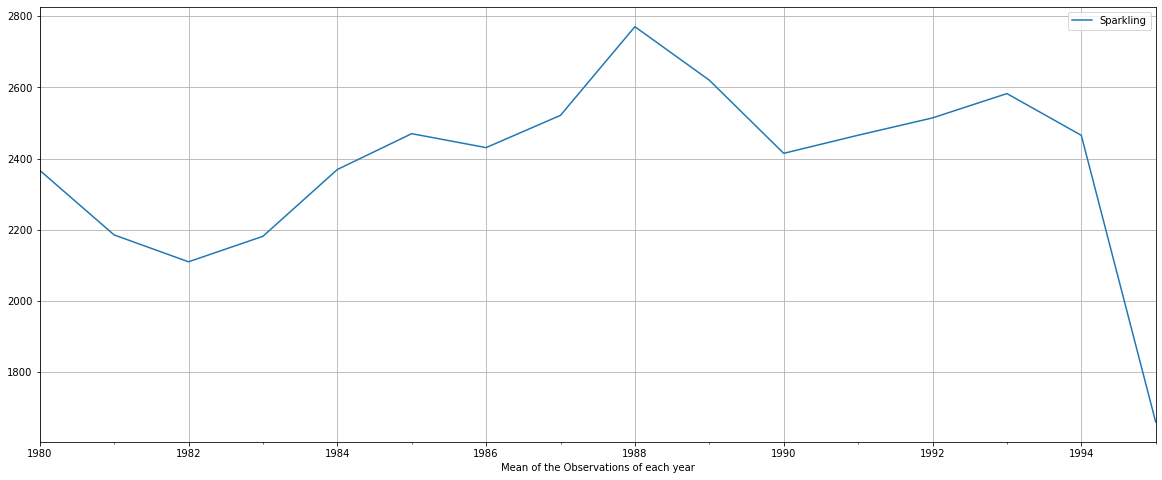

In [19]:
df_yearly_sum_spark.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');
df_yearly_mean_spark.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

<b>Quarterly Plot

In [20]:
df_quarterly_sum_spark = df_spark.resample('Q').sum()
print(df_quarterly_sum_spark.head())
df_quarterly_mean_spark = df_spark.resample('Q').mean()
print(df_quarterly_mean_spark.head())

            Sparkling
YearMonth            
1980-03-31       5581
1980-06-30       4560
1980-09-30       6403
1980-12-31      11862
1981-03-31       4686
              Sparkling
YearMonth              
1980-03-31  1860.333333
1980-06-30  1520.000000
1980-09-30  2134.333333
1980-12-31  3954.000000
1981-03-31  1562.000000


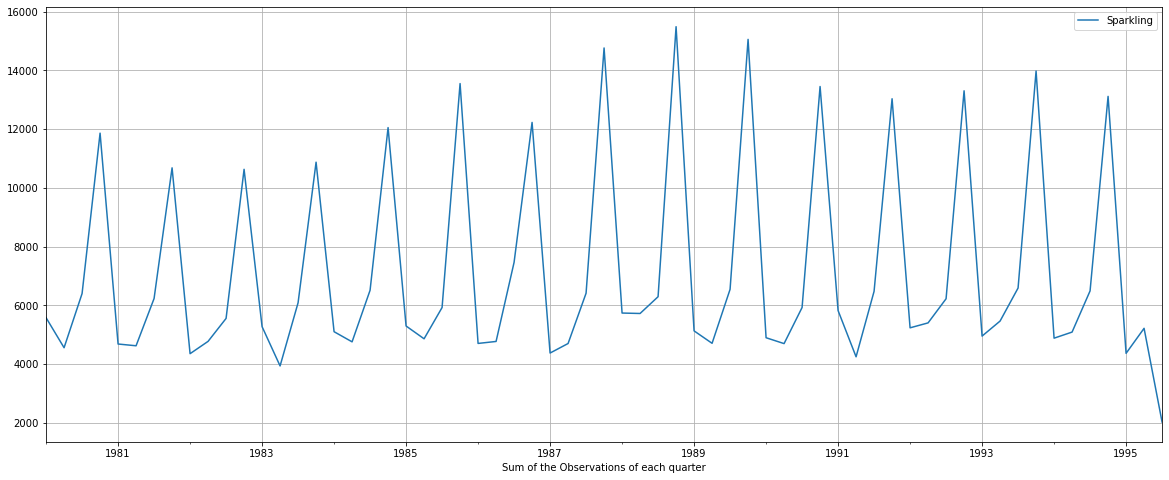

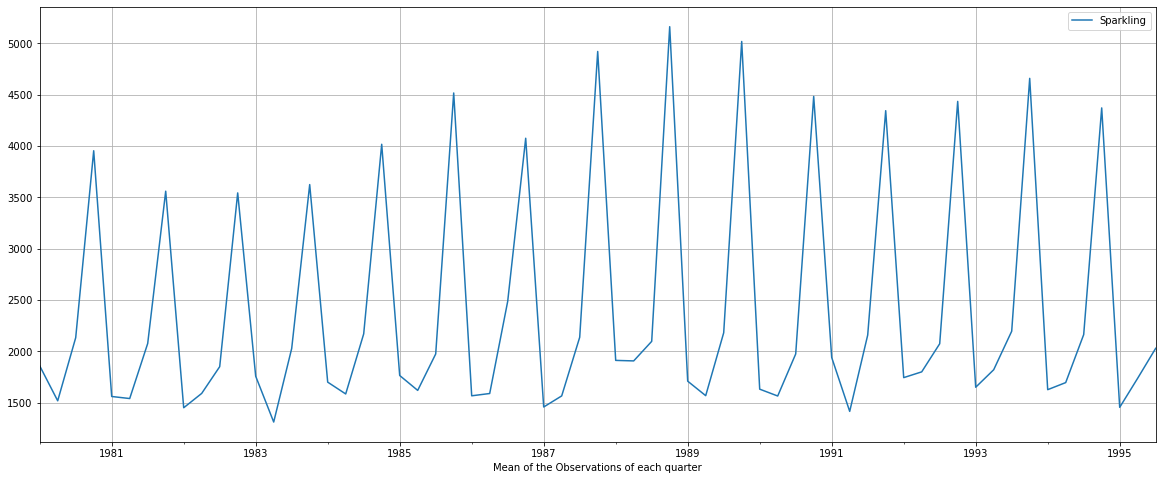

In [21]:
df_quarterly_sum_spark.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each quarter');
df_quarterly_mean_spark.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each quarter');

<b>Daily Plot

In [22]:
df_daily_sum_spark = df_spark.resample('D').sum()
print(df_daily_sum_spark.head())

            Sparkling
YearMonth            
1980-01-01       1686
1980-01-02          0
1980-01-03          0
1980-01-04          0
1980-01-05          0


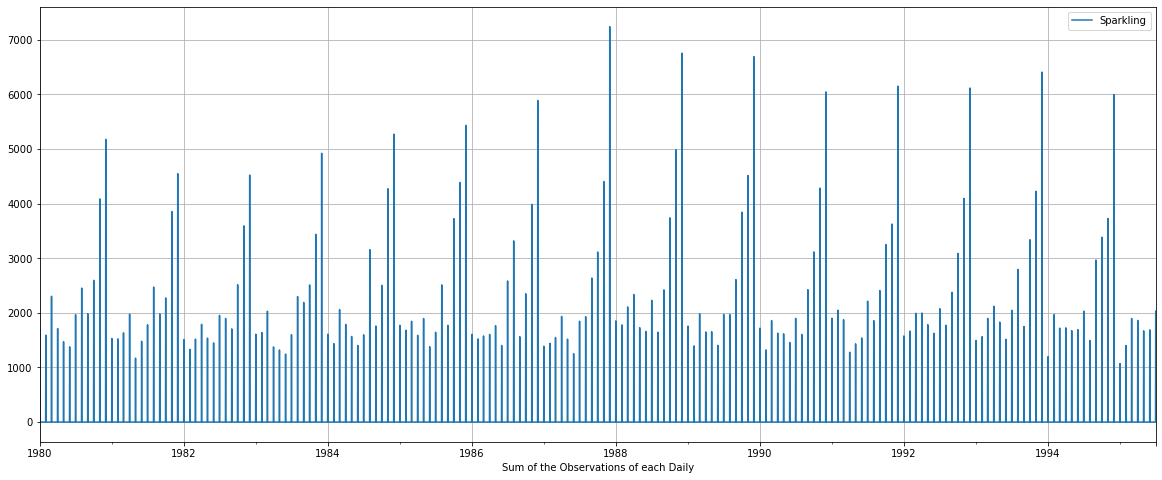

In [23]:
df_daily_sum_spark.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each Daily');

<b>Plot Empherical Cumative Distribution

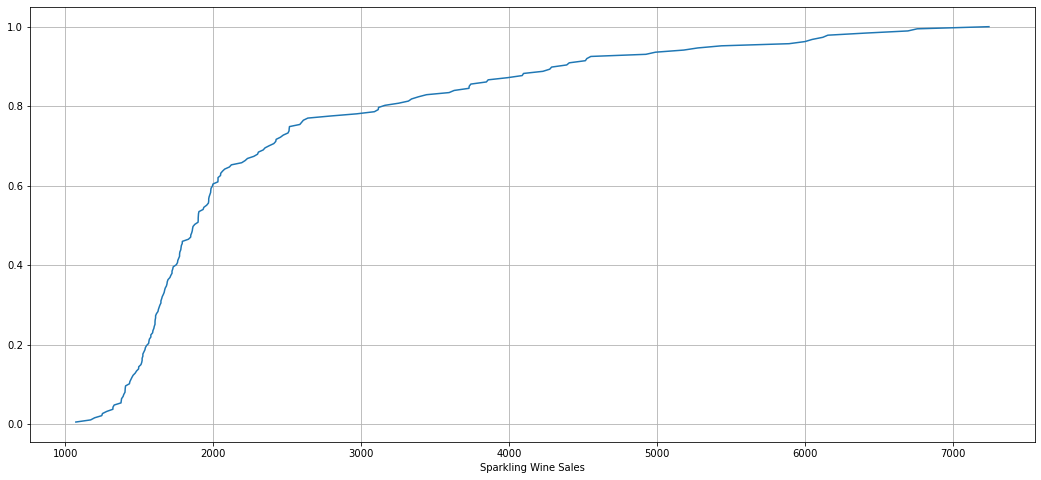

In [24]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df_spark['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sparkling Wine Sales');

<b> This Graph gives percentage of sales 

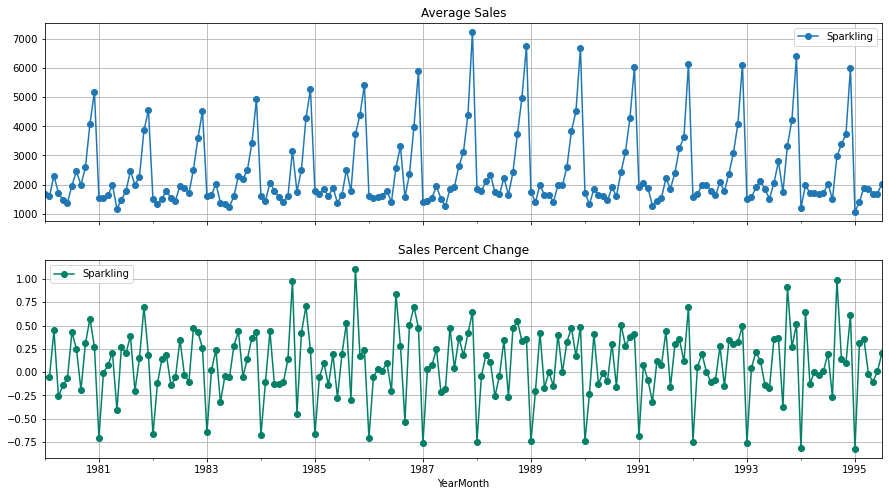

In [25]:
# group by date and get average Sales, and precent change
average    = df_spark.groupby(df_spark.index)["Sparkling"].mean()
pct_change = df_spark.groupby(df_spark.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Sales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Sales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sales Percent Change",grid=True)

<b>The above two graphs tells us the Average 'Sparkling wine sales' and the Percentage change of 'Sparkling wine sales' with respect to the time.

# Decompose the Time Series

<b>Sparkling Wine : Additive and Multiplicative Model Decomposition

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

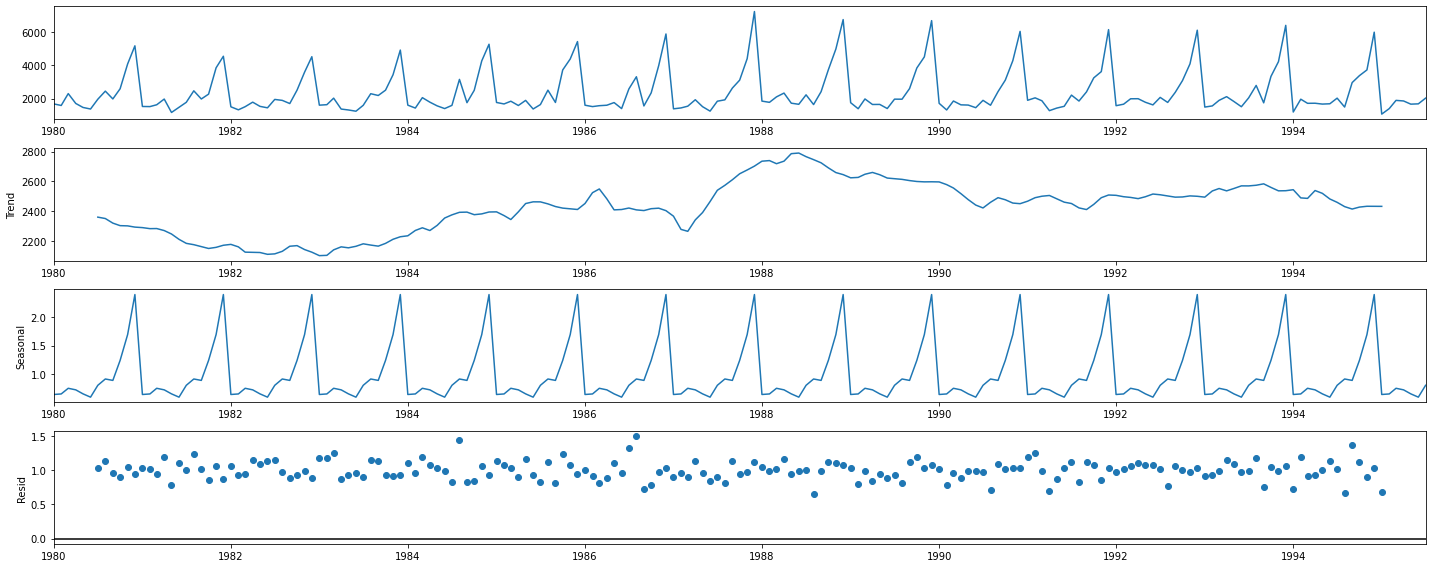

In [27]:
decomposition_spark = seasonal_decompose(df_spark,model='multiplicative')
decomposition_spark.plot();

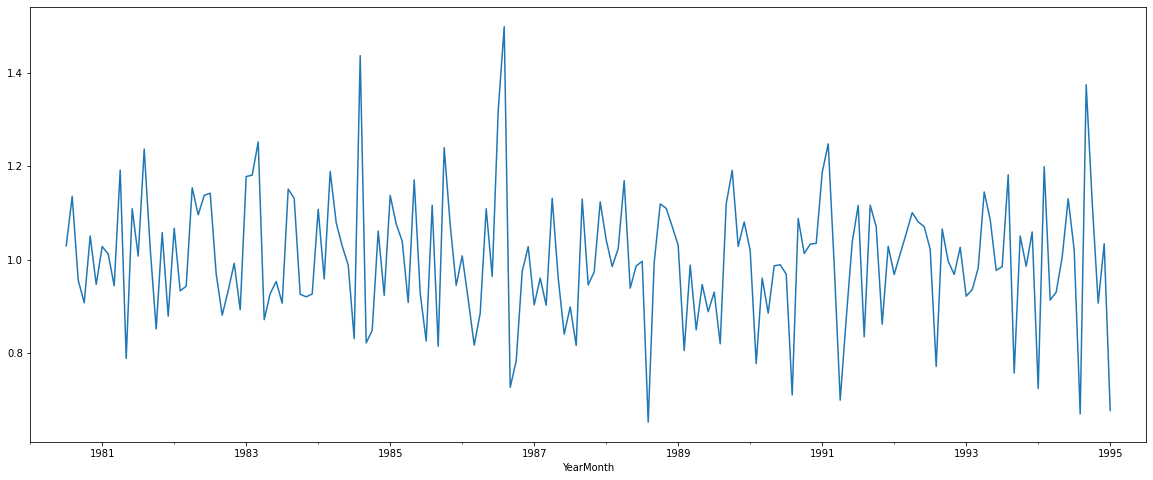

In [28]:
decomposition_spark.resid.plot()

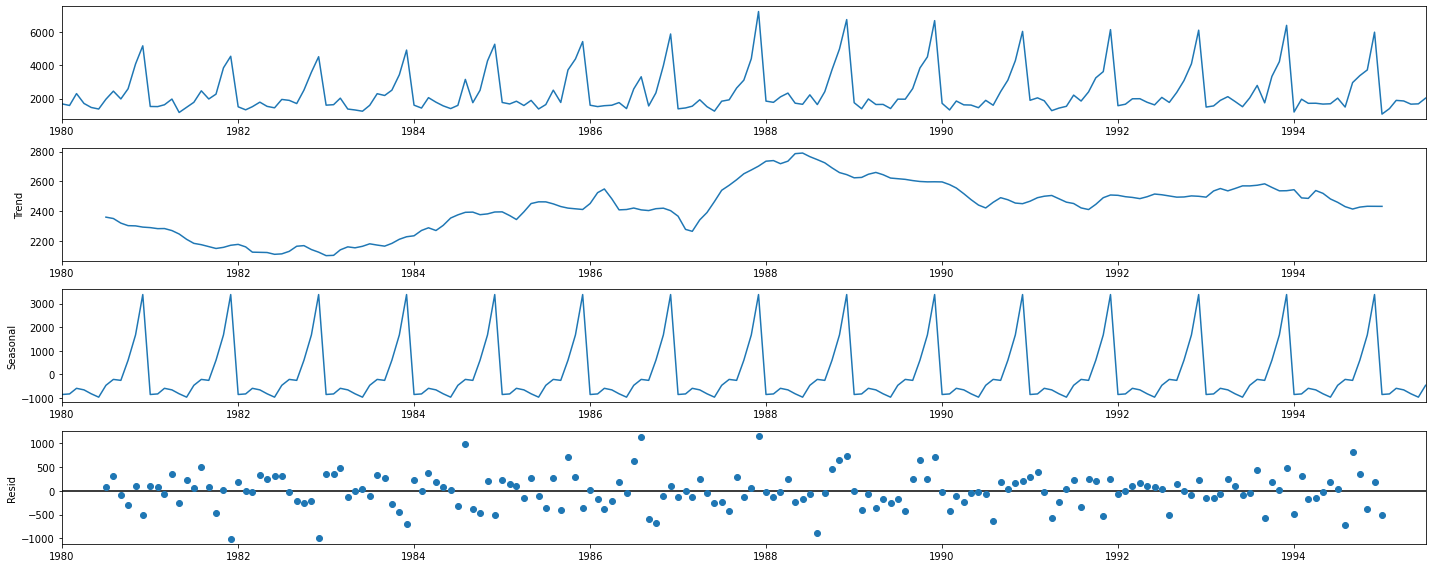

In [29]:
decomposition_spark = seasonal_decompose(df_spark,model='additive')
decomposition_spark.plot();

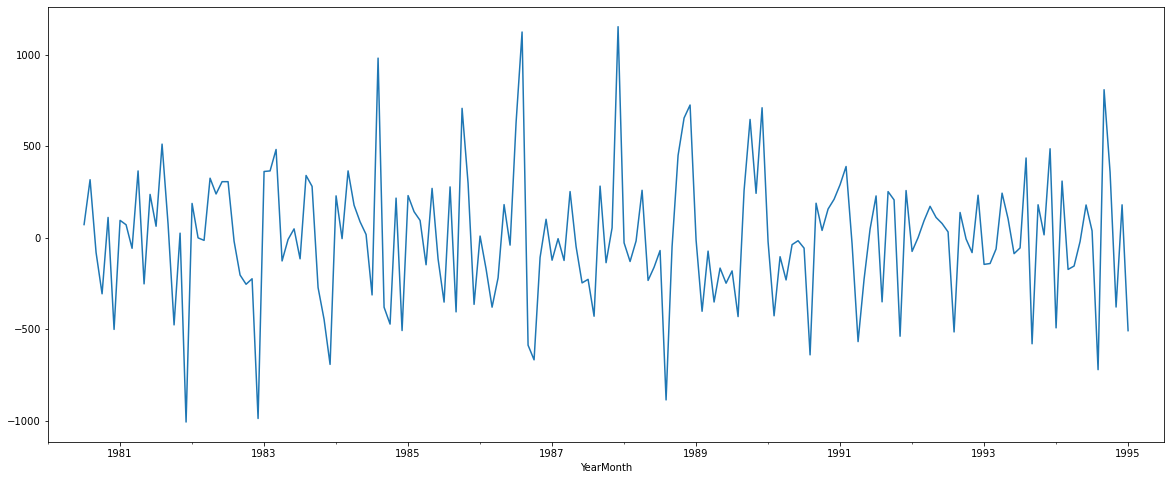

In [30]:
decomposition_spark.resid.plot()

In [31]:
trend = decomposition_spark.trend
seasonality = decomposition_spark.seasonal
residual = decomposition_spark.resid

In [32]:
print('Trend','\n',trend.head(4),'\n')
print('Seasonality','\n',seasonality.head(4),'\n')
print('Residual','\n',residual.head(4),'\n')

Trend 
 YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -854.260599
1980-02-01   -830.350678
1980-03-01   -592.356630
1980-04-01   -658.490559
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
Name: resid, dtype: float64 



<b> Deseasonalized Time Series

In [33]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(12)

YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2431.502265
1980-08-01    2667.332821
1980-09-01    2238.677265
1980-10-01    1996.230043
1980-11-01    2411.932821
1980-12-01    1792.016154
dtype: float64

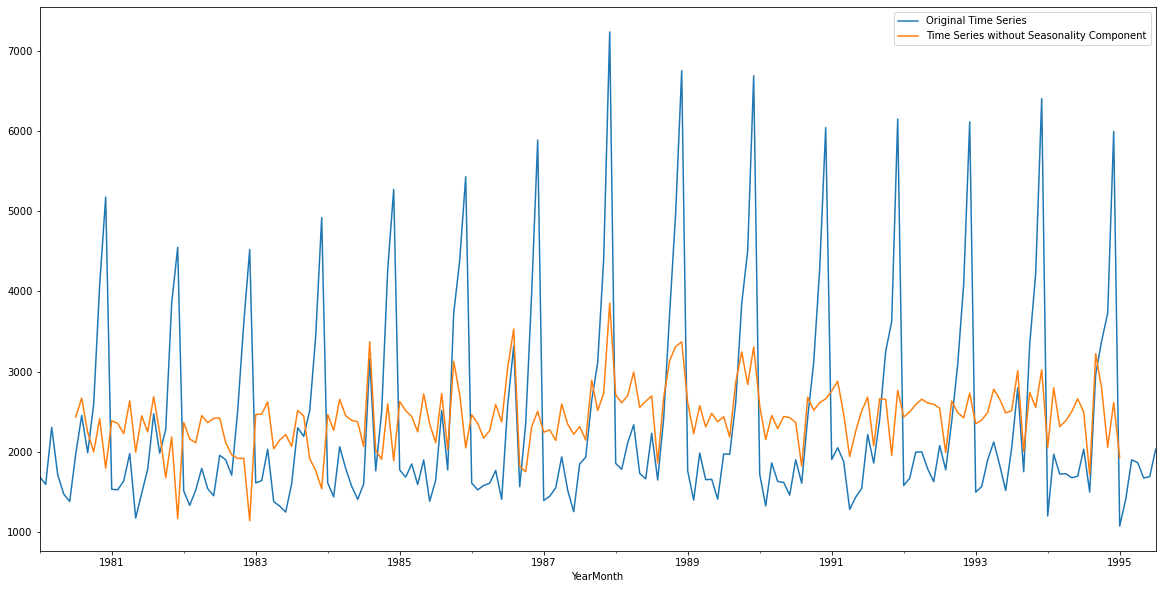

In [34]:
df_spark.plot(figsize=(20,10))
deaseasonalized_ts.plot(figsize=(20,10))
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

<b> 
*Series is showing strong seasonal component
    
*Trend is varying over time with increase and decrease of sales

*From TS decomposition we can infere that it is additive in Nature
    

# 3.Split the data into training and test. The test data should start in 1991.

<b>#Creating train and test set 

In [35]:
train=df_spark[df_spark.index.year<1991]
test=df_spark[df_spark.index.year>=1991]
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


<b>#Printing the beginning and the ending of the training data

In [36]:
print("\n Training data start at \n")
print (train[train.index == train.index.min()],['Year','Quarter'],'\n')
print("\n Training data ends at \n")
print (train[train.index == train.index.max()],['Year','Quarter'],'\n')


 Training data start at 

            Sparkling
YearMonth            
1980-01-01       1686 ['Year', 'Quarter'] 


 Training data ends at 

            Sparkling
YearMonth            
1990-12-01       6047 ['Year', 'Quarter'] 



<b>#Printing the beginning and the ending of the test data

In [37]:
print("\n Test data start at \n")
print (test[test.index == test.index.min()],['Year','Quarter'],'\n')
print("\n Test data ends at \n")
print (test[test.index == test.index.max()],['Year','Quarter'],'\n')


 Test data start at 

            Sparkling
YearMonth            
1991-01-01       1902 ['Year', 'Quarter'] 


 Test data ends at 

            Sparkling
YearMonth            
1995-07-01       2031 ['Year', 'Quarter'] 



<b>#Plotting the training and test data

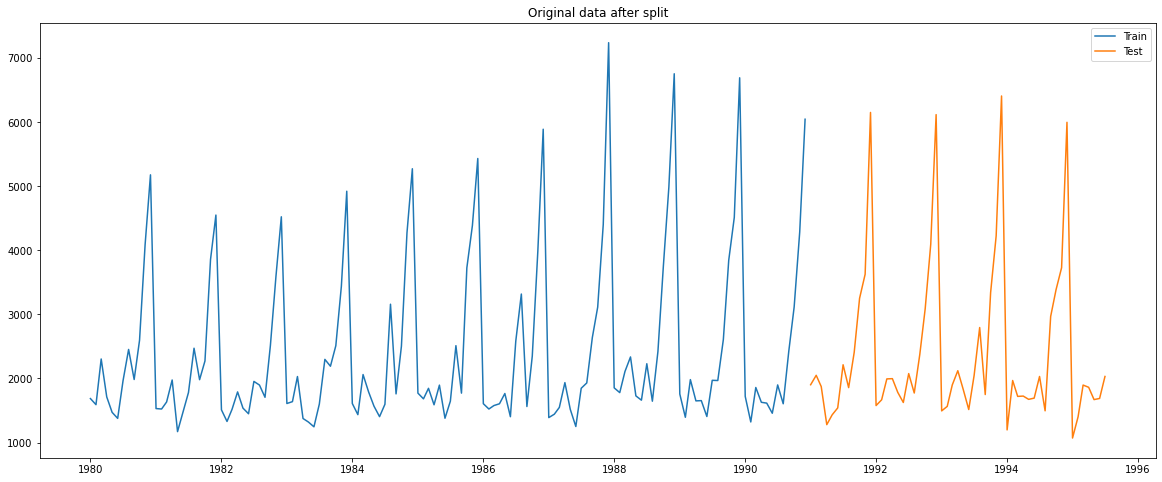

In [38]:
plt.plot(train.Sparkling, label = 'Train')
plt.plot(test.Sparkling,  label = 'Test')
plt.legend(loc = 'best')
plt.title('Original data after split')
plt.show()

<b> Conclusion  : Train and Test Data is splitted.Test Samples are available from 1991 onwwards

# 4.Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.


# Building different models and comparing the accuracy metrics.

# Model 1: Linear Regression

In [39]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


<b>We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [40]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [41]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5 

Last few rows of Training Data 
             Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132 

First few rows of Test Data 
             Sparkling  time
YearMonth                  
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135
1991-04-01       1279   136
1991-05-01       1432   137 

Last few rows of Test Data 
             Sparkling  time
YearMonth                  
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187 



<b>Now that our training and test data has been modified, let us go ahead use  𝐿𝑖𝑛𝑒𝑎𝑟𝑅𝑒𝑔𝑟𝑒𝑠𝑠𝑖𝑜𝑛 to build the model on the training data and test the model on the test data.

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lr = LinearRegression()

In [44]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

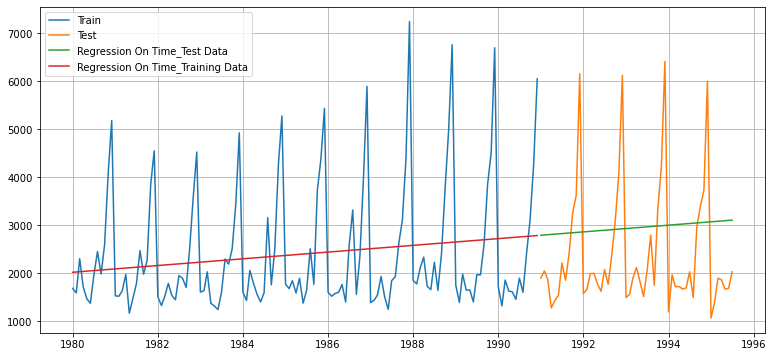

In [45]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Training Data')
plt.legend(loc='best')
plt.grid();

<b>Functions and Accuracy Metrics

In [46]:
from sklearn import metrics

In [47]:
## Mean Absolute Percentage - Function Definition

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

# Model Evaluation

In [48]:
## Training Data - RMSE and MAPE

rmse_model1_train = metrics.mean_squared_error(train['Sparkling'],train_predictions_model1,squared=False)
mape_model1_train = MAPE(train['Sparkling'],train_predictions_model1)
print("For RegressionOnTime forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_train, mape_model1_train))

For RegressionOnTime forecast on the Training Data,  RMSE is 1279.322 MAPE is 40.05


In [49]:
## Test Data - RMSE and MAPE

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
mape_model1_test = MAPE(test['Sparkling'],test_predictions_model1)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_test, mape_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135 MAPE is 50.15


In [50]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test],'Test MAPE': [mape_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15

# Model 2: Naive Approach:

In [51]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [52]:
## Let us get the last value (or the most recent value) of the training set.

NaiveModel_train['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_train['naive'].head()

YearMonth
1980-01-01    6047
1980-02-01    6047
1980-03-01    6047
1980-04-01    6047
1980-05-01    6047
Name: naive, dtype: int64

In [53]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

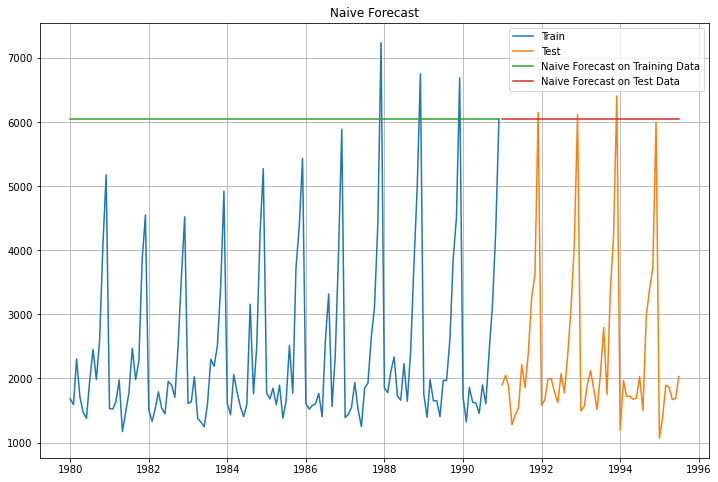

In [54]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

# Model Evaluation

In [55]:
## Training Data - RMSE and MAPE

rmse_model2_train = metrics.mean_squared_error(train['Sparkling'],NaiveModel_train['naive'],squared=False)
mape_model2_train = MAPE(train['Sparkling'],NaiveModel_train['naive'])
print("For Naive Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_train, mape_model2_train))

For Naive Model forecast on the Training Data,  RMSE is 3867.701 MAPE is 153.17


In [56]:
## Test Data - RMSE and MAPE

rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
mape_model2_test = MAPE(test['Sparkling'],NaiveModel_test['naive'])
print("For Naive Mode forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_test, mape_model2_test))

For Naive Mode forecast on the Test Data,  RMSE is 3864.279 MAPE is 152.87


In [57]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test],'Test MAPE': [mape_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15
NaiveModel        3864.279352     152.87

# Method 3: Simple Average

In [58]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [59]:
## Let us get the last value (or the most recent value) of the training set.

SimpleAverage_train['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_train.head()

Sparkling  mean_forecast
YearMonth                           
1980-01-01       1686    2403.780303
1980-02-01       1591    2403.780303
1980-03-01       2304    2403.780303
1980-04-01       1712    2403.780303
1980-05-01       1471    2403.780303

In [60]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
YearMonth                           
1991-01-01       1902    2403.780303
1991-02-01       2049    2403.780303
1991-03-01       1874    2403.780303
1991-04-01       1279    2403.780303
1991-05-01       1432    2403.780303

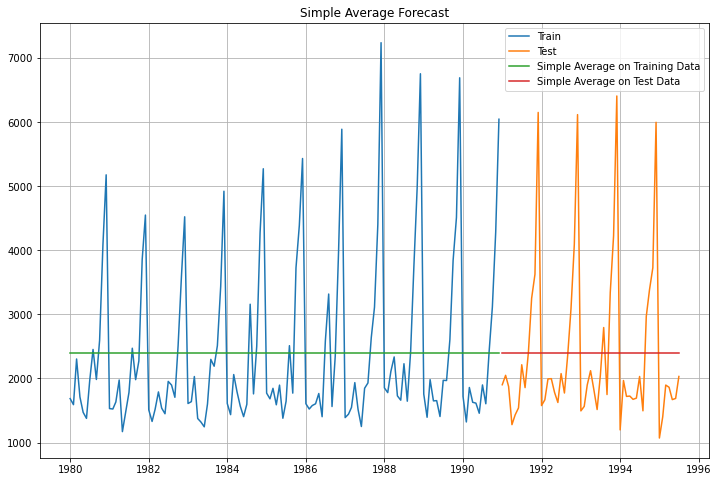

In [61]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

# Model Evaluation

In [62]:
## Training Data - RMSE and MAPE

rmse_model3_train = metrics.mean_squared_error(train['Sparkling'],SimpleAverage_train['mean_forecast'],squared=False)
mape_model3_train = MAPE(train['Sparkling'],SimpleAverage_train['mean_forecast'])
print("For Simple Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_train, mape_model3_train))

For Simple Average Model forecast on the Training Data,  RMSE is 1298.484 MAPE is 40.36


In [63]:
## Test Data - RMSE and MAPE

rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
mape_model3_test = MAPE(test['Sparkling'],SimpleAverage_test['mean_forecast'])
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_test, mape_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082 MAPE is 38.90


In [64]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test],'Test MAPE': [mape_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime    1389.135175      50.15
NaiveModel          3864.279352     152.87
SimpleAverageModel  1275.081804      38.90

# Method 4: Moving Average(MA)

In [65]:
MovingAverage = df_spark.copy()
print(MovingAverage.head(2),'\n')
print(MovingAverage.shape)

            Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591 

(187, 1)


<b>Trailing moving averages

In [66]:

MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head(10)

Sparkling  Trailing_2  Trailing_4   Trailing_6   Trailing_9
YearMonth                                                              
1980-01-01       1686         NaN         NaN          NaN          NaN
1980-02-01       1591      1638.5         NaN          NaN          NaN
1980-03-01       2304      1947.5         NaN          NaN          NaN
1980-04-01       1712      2008.0     1823.25          NaN          NaN
1980-05-01       1471      1591.5     1769.50          NaN          NaN
1980-06-01       1377      1424.0     1716.00  1690.166667          NaN
1980-07-01       1966      1671.5     1631.50  1736.833333          NaN
1980-08-01       2453      2209.5     1816.75  1880.500000          NaN
1980-09-01       1984      2218.5     1945.00  1827.166667  1838.222222
1980-10-01       2596      2290.0     2249.75  1974.500000  1939.333333

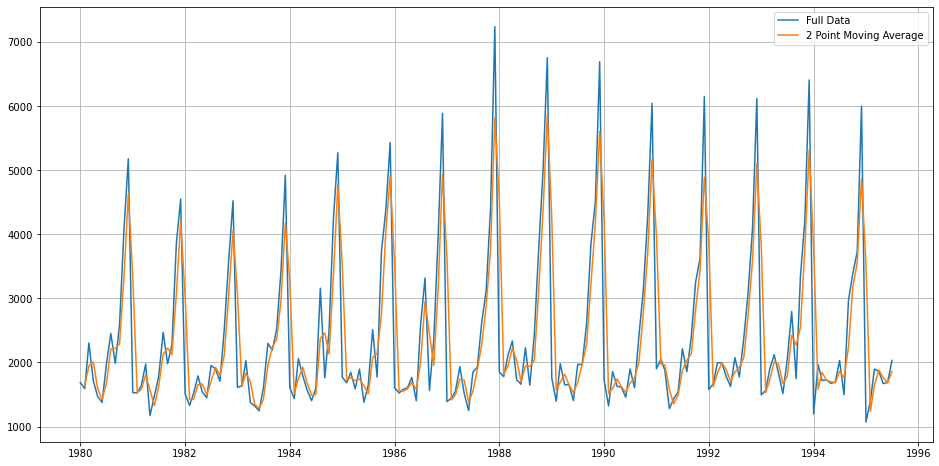

In [67]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Full Data')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.legend(loc = 'best')
plt.grid();

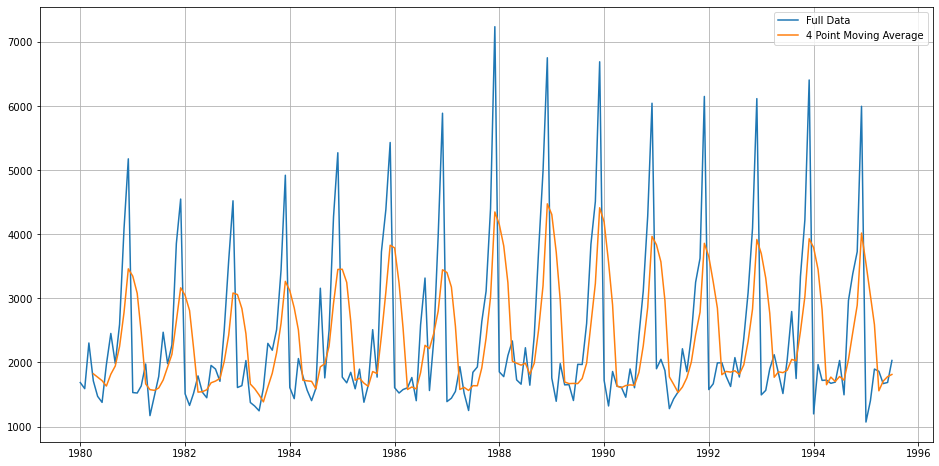

In [68]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Full Data')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.legend(loc = 'best')
plt.grid();

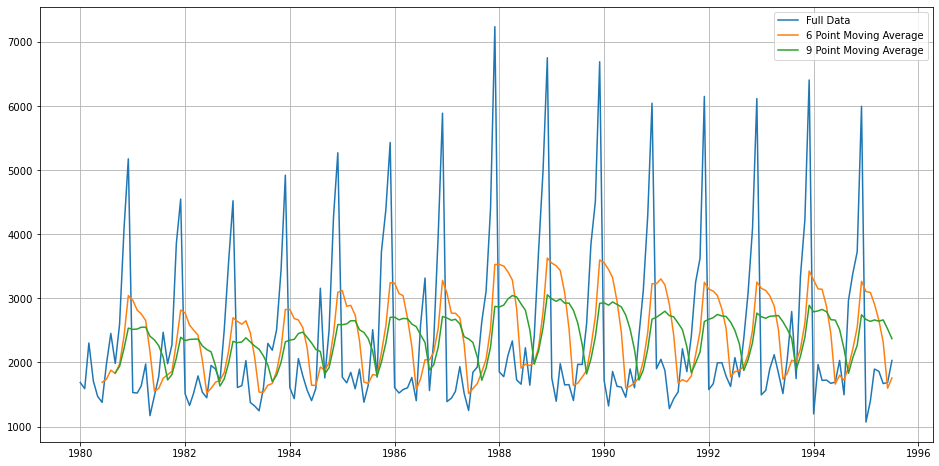

In [69]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Full Data')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best')
plt.grid();

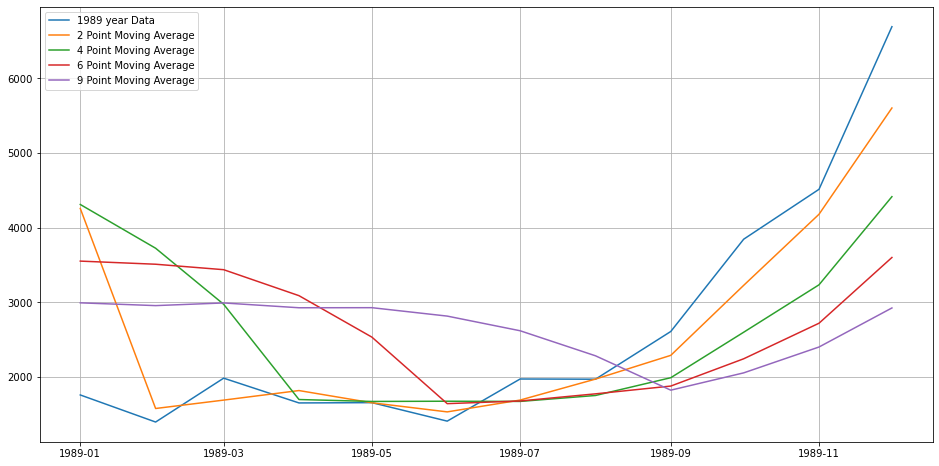

In [70]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'][MovingAverage.index.year==1989], label='1989 year Data')
plt.plot(MovingAverage['Trailing_2'][MovingAverage.index.year==1989], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'][MovingAverage.index.year==1989], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'][MovingAverage.index.year==1989],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'][MovingAverage.index.year==1989],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [71]:
MovingAverage.head(2)

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                            
1980-01-01       1686         NaN         NaN         NaN         NaN
1980-02-01       1591      1638.5         NaN         NaN         NaN

In [72]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year<1991]
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year>=1991]
print(trailing_MovingAverage_train.head(1))
print(trailing_MovingAverage_test.head(1))

            Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                            
1980-01-01       1686         NaN         NaN         NaN         NaN
            Sparkling  Trailing_2  Trailing_4  Trailing_6   Trailing_9
YearMonth                                                             
1991-01-01       1902      3974.5     3837.75      3230.0  2705.666667


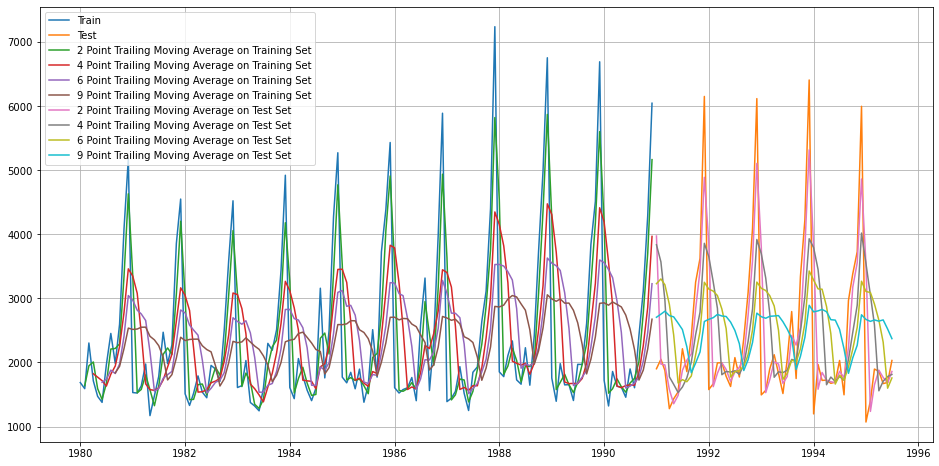

In [73]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

# Model Evaluation

In [74]:
## Test Data - RMSE and MAPE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
mape_model4_test_2 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_2, mape_model4_test_2))

## Test Data - RMSE and MAPE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
mape_model4_test_4 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_4, mape_model4_test_4))

## Test Data - RMSE and MAPE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
mape_model4_test_6 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_6, mape_model4_test_6))

## Test Data - RMSE and MAPE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
mape_model4_test_9 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_9, mape_model4_test_9))

For 2 point Moving Average Model forecast on the Test Data,  RMSE is 813.401 MAPE is 19.70
For 4 point Moving Average Model forecast on the Test Data,  RMSE is 1156.590 MAPE is 35.96
For 6 point Moving Average Model forecast on the Test Data,  RMSE is 1283.927 MAPE is 43.86
For 9 point Moving Average Model forecast on the Test Data,  RMSE is 1346.278 MAPE is 46.86


In [75]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]
                            ,'Test MAPE': [mape_model4_test_2,mape_model4_test_4,mape_model4_test_6
                                           ,mape_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime             1389.135175      50.15
NaiveModel                   3864.279352     152.87
SimpleAverageModel           1275.081804      38.90
2pointTrailingMovingAverage   813.400684      19.70
4pointTrailingMovingAverage  1156.589694      35.96
6pointTrailingMovingAverage  1283.927428      43.86
9pointTrailingMovingAverage  1346.278315      46.86

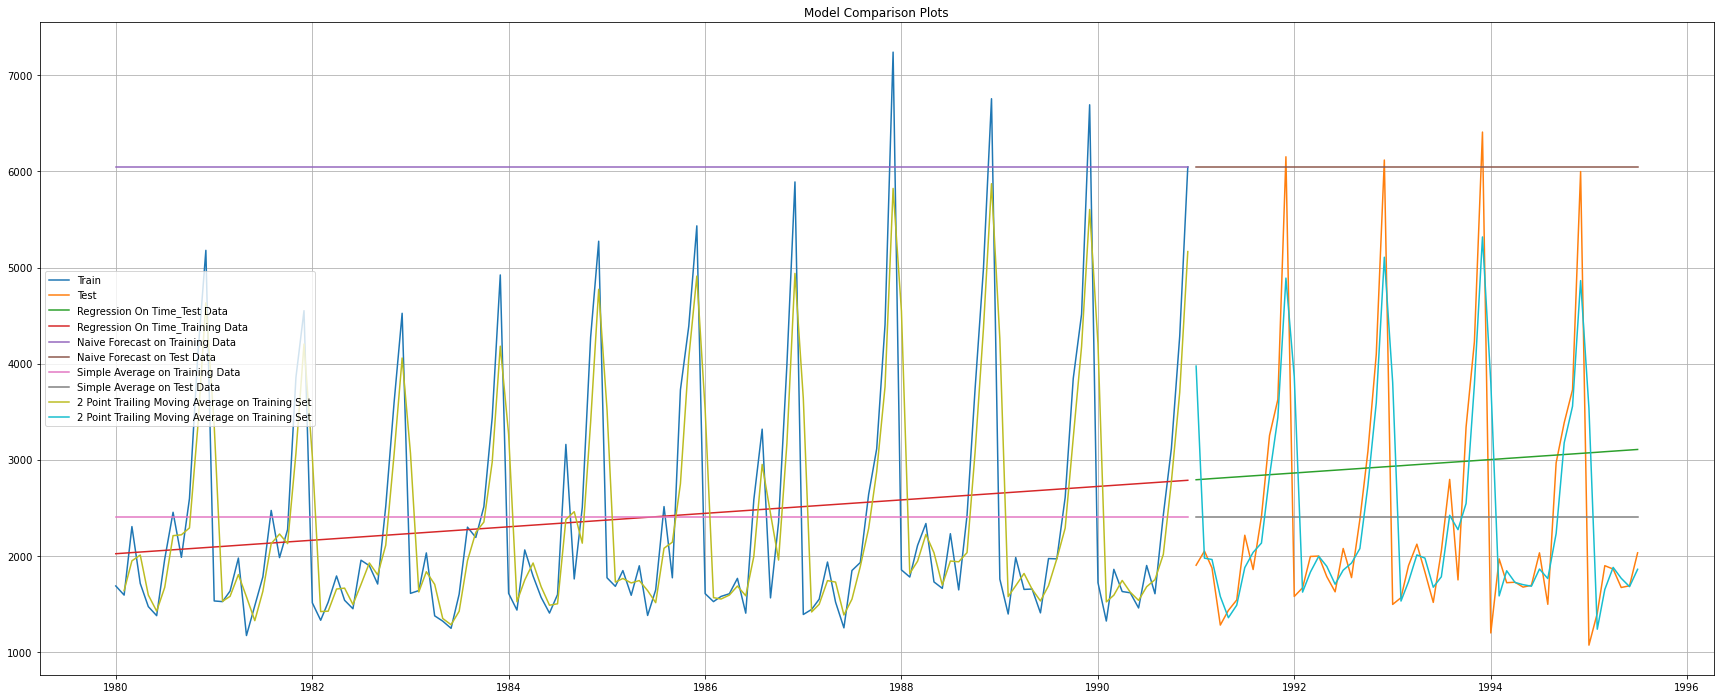

In [76]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

# Method 5: Simple Exponential Smoothing

In [77]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [78]:
SES_train = train.copy()
SES_test = test.copy()

In [79]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [80]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

In [81]:
model_SES_autofit.params

{'smoothing_level': 0.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 2403.7936033261967,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [82]:
SES_train['predict'] = model_SES_autofit.fittedvalues
SES_train.head()

Sparkling      predict
YearMonth                         
1980-01-01       1686  2403.793603
1980-02-01       1591  2403.793603
1980-03-01       2304  2403.793603
1980-04-01       1712  2403.793603
1980-05-01       1471  2403.793603

In [83]:
len(SES_test)

55

In [84]:
SES_test['predict'] = model_SES_autofit.forecast(steps=55)
SES_test.head()

Sparkling      predict
YearMonth                         
1991-01-01       1902  2403.793603
1991-02-01       2049  2403.793603
1991-03-01       1874  2403.793603
1991-04-01       1279  2403.793603
1991-05-01       1432  2403.793603

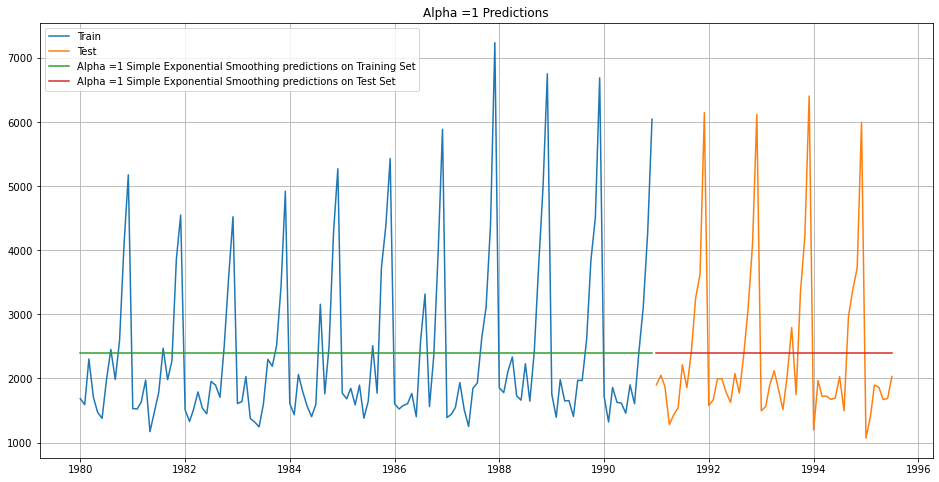

In [85]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_train['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =1 Predictions');

# Model Evaluation for  𝛼  = 1 : Simple Exponential Smoothing

In [86]:
## Training Data

rmse_model5_train_1 = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict'],squared=False)
mape_model5_train_1 = MAPE(SES_train['Sparkling'],SES_train['predict'])
print("For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_train_1, mape_model5_train_1))

For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 1298.484 MAPE is 40.36


In [87]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
mape_model5_test_1 = MAPE(SES_test['Sparkling'],SES_test['predict'])
print("For Alpha =1 Simple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_test_1, mape_model5_test_1))


For Alpha =1 Simple Exponential Smoothing Model forecast on the Test Data,  RMSE is 1275.082 MAPE is 38.90


In [88]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1],'Test MAPE': [mape_model5_test_1]}
                           ,index=['Alpha=1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                    1389.135175      50.15
NaiveModel                          3864.279352     152.87
SimpleAverageModel                  1275.081804      38.90
2pointTrailingMovingAverage          813.400684      19.70
4pointTrailingMovingAverage         1156.589694      35.96
6pointTrailingMovingAverage         1283.927428      43.86
9pointTrailingMovingAverage         1346.278315      46.86
Alpha=1,SimpleExponentialSmoothing  1275.081852      38.90

# Setting different alpha values.

In [89]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [90]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=True,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    mape_model5_train_i = MAPE(SES_train['Sparkling'],SES_train['predict',i])
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    mape_model5_test_i = MAPE(SES_test['Sparkling'],SES_test['predict',i])
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Train MAPE': mape_model5_train_i,'Test RMSE':rmse_model5_test_i
                                      ,'Test MAPE':mape_model5_test_i}, ignore_index=True)

<b>Model Evaluation

In [91]:
resultsDf_6

Alpha Values   Train RMSE  Train MAPE    Test RMSE  Test MAPE
0           0.3  1359.422161       43.80  1935.507132      75.66
1           0.4  1352.562367       42.79  2311.919615      91.55
2           0.5  1343.994119       41.18  2666.351413     106.27
3           0.6  1338.801428       39.81  2979.204388     118.77
4           0.7  1338.843297       38.56  3249.944092     129.34
5           0.8  1344.462034       37.60  3483.801006     138.34
6           0.9  1355.723493       36.79  3686.794285     146.08

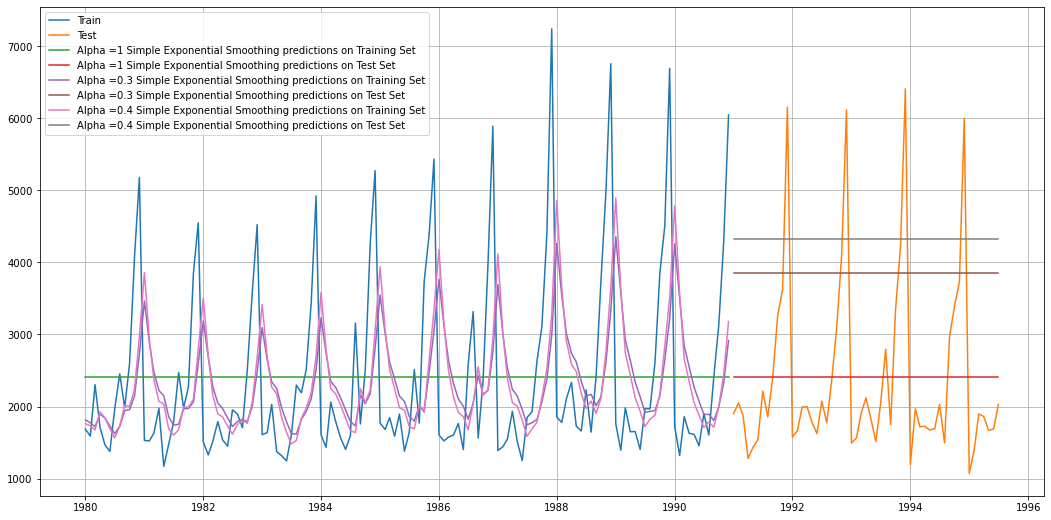

In [92]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_train['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_train['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_train['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [93]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6['Test RMSE'][0],resultsDf_6['Test RMSE'][1]]
                            ,'Test MAPE': [resultsDf_6['Test MAPE'][0],resultsDf_6['Test MAPE'][1]]}
                           ,index=['Alpha=0.3,SimpleExponentialSmoothing','Alpha=0.4,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                      1389.135175      50.15
NaiveModel                            3864.279352     152.87
SimpleAverageModel                    1275.081804      38.90
2pointTrailingMovingAverage            813.400684      19.70
4pointTrailingMovingAverage           1156.589694      35.96
6pointTrailingMovingAverage           1283.927428      43.86
9pointTrailingMovingAverage           1346.278315      46.86
Alpha=1,SimpleExponentialSmoothing    1275.081852      38.90
Alpha=0.3,SimpleExponentialSmoothing  1935.507132      75.66
Alpha=0.4,SimpleExponentialSmoothing  2311.919615      91.55

# Method 6: Double Exponential Smoothing (Holt's Model)

In [94]:
DES_train = train.copy()
DES_test = test.copy()

In [95]:
model_DES = Holt(DES_train['Sparkling'])

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [96]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [97]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        mape_model6_train = MAPE(DES_train['Sparkling'],DES_train['predict',i,j])
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        mape_model6_test = MAPE(DES_test['Sparkling'],DES_test['predict',i,j])
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                      ,'Train MAPE': mape_model6_train,'Test RMSE':rmse_model6_test
                                      ,'Test MAPE':mape_model6_test}, ignore_index=True)

In [98]:
resultsDf_7.sort_values(by=['Test RMSE']).head(4)

Alpha Values  Beta Values   Train RMSE  Train MAPE     Test RMSE  \
0            0.3          0.3  1590.151689       53.80  18259.110704   
8            0.4          0.3  1568.527728       50.15  23878.496940   
1            0.3          0.4  1681.706138       57.15  26069.841401   
16           0.5          0.3  1530.223987       45.98  27095.532414   

    Test MAPE  
0      675.28  
8      886.00  
1      960.18  
16    1007.39

In [99]:
resultsDf_7.sort_values(by=['Test MAPE']).head()

Alpha Values  Beta Values   Train RMSE  Train MAPE     Test RMSE  \
0            0.3          0.3  1590.151689       53.80  18259.110704   
8            0.4          0.3  1568.527728       50.15  23878.496940   
1            0.3          0.4  1681.706138       57.15  26069.841401   
16           0.5          0.3  1530.223987       45.98  27095.532414   
24           0.6          0.3  1506.223120       42.82  29070.722592   

    Test MAPE  
0      675.28  
8      886.00  
1      960.18  
16    1007.39  
24    1082.18

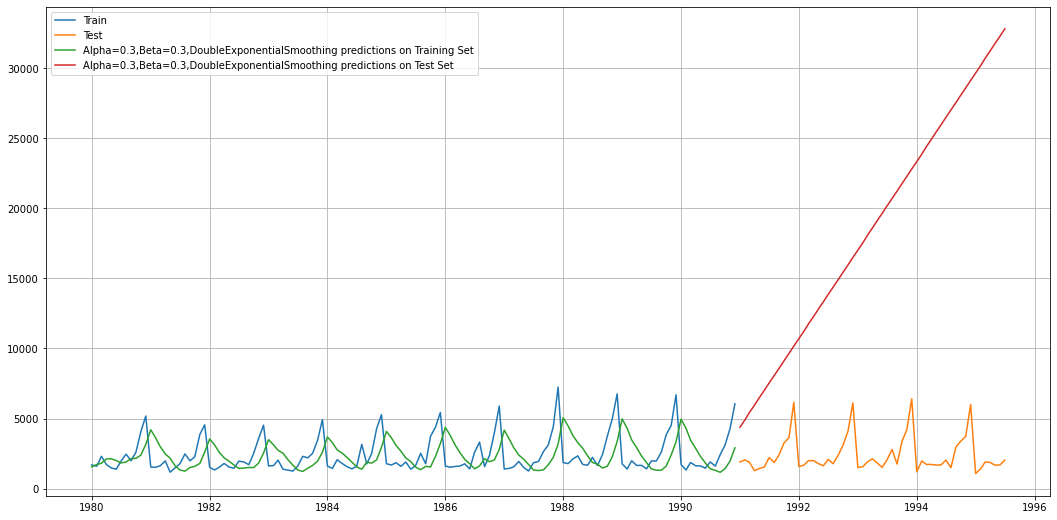

In [100]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_train['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [101]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7['Test RMSE'][0]],'Test MAPE':[resultsDf_7['Test MAPE'][0]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                1389.135175      50.15
NaiveModel                                      3864.279352     152.87
SimpleAverageModel                              1275.081804      38.90
2pointTrailingMovingAverage                      813.400684      19.70
4pointTrailingMovingAverage                     1156.589694      35.96
6pointTrailingMovingAverage                     1283.927428      43.86
9pointTrailingMovingAverage                     1346.278315      46.86
Alpha=1,SimpleExponentialSmoothing              1275.081852      38.90
Alpha=0.3,SimpleExponentialSmoothing            1935.507132      75.66
Alpha=0.4,SimpleExponentialSmoothing            2311.919615      91.55
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing  18259.110704     675.28

# Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

In [102]:
TES_train = train.copy()
TES_test = test.copy()

In [103]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='additive',seasonal_periods = 12)

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [104]:
model_TES_autofit = model_TES.fit()

In [105]:
model_TES_autofit.params

{'smoothing_level': 0.0862166017613437,
 'smoothing_slope': 2.067191130364504e-08,
 'smoothing_seasonal': 0.47635201768149155,
 'damping_slope': nan,
 'initial_level': 1684.7503240306992,
 'initial_slope': 0.006644747966296341,
 'initial_seasons': array([  39.19962777,  -37.26394198,  465.14463945,  205.81325905,
        -140.70181635, -156.93654663,  338.06509925,  856.76349521,
         403.44817202,  971.24591438, 2401.70088928, 3426.90392255]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [106]:
## Prediction on the training data

TES_train['auto_predict'] = model_TES_autofit.fittedvalues
TES_train.head()

Sparkling  auto_predict
YearMonth                          
1980-01-01       1686   1723.956597
1980-02-01       1591   1644.227183
1980-03-01       2304   2142.053342
1980-04-01       1712   1896.691097
1980-05-01       1471   1534.259227

In [107]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=55)
TES_test.head()

Sparkling  auto_predict
YearMonth                          
1991-01-01       1902   1532.429482
1991-02-01       2049   1241.393545
1991-03-01       1874   1726.788728
1991-04-01       1279   1584.332769
1991-05-01       1432   1494.031582

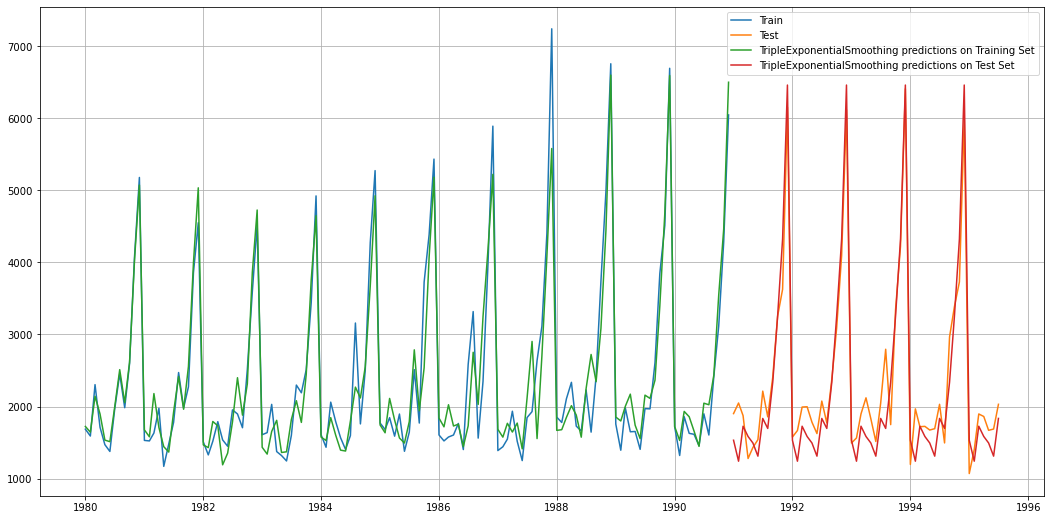

In [108]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_train['auto_predict'], label='TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['auto_predict'], label='TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [109]:
## Training Data

rmse_model6_train_1 = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['auto_predict'],squared=False)
mape_model6_train_1 = MAPE(TES_train['Sparkling'],TES_train['auto_predict'])
print("For Alpha: 0.0862166017613437,Beta: 2.067191130364504e-08 and Gamma: 0.47635201768149155, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model6_train_1, mape_model6_train_1))

For Alpha: 0.0862166017613437,Beta: 2.067191130364504e-08 and Gamma: 0.47635201768149155, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is 371.264 MAPE is 10.90


In [110]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
mape_model6_test_1 = MAPE(TES_test['Sparkling'],TES_test['auto_predict'])
print("For Alpha: 0.0862166017613437,Beta: 2.067191130364504e-08 and Gamma: 0.47635201768149155, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model6_test_1, mape_model6_test_1))

For Alpha: 0.0862166017613437,Beta: 2.067191130364504e-08 and Gamma: 0.47635201768149155, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 362.728 MAPE is 12.08


In [111]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1],'Test MAPE':[mape_model6_test_1]}
                           ,index=['Alpha=0.0862,Beta=2.067e-08,Gamma=0.4763,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                     1389.135175      50.15
NaiveModel                                           3864.279352     152.87
SimpleAverageModel                                   1275.081804      38.90
2pointTrailingMovingAverage                           813.400684      19.70
4pointTrailingMovingAverage                          1156.589694      35.96
6pointTrailingMovingAverage                          1283.927428      43.86
9pointTrailingMovingAverage                          1346.278315      46.86
Alpha=1,SimpleExponentialSmoothing                   1275.081852      38.90
Alpha=0.3,SimpleExponentialSmoothing                 1935.507132      75.66
Alpha=0.4,SimpleExponentialSmoothing                 2311.919615      91.55
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704     675.28
Alpha=0.0862,Beta=2.067e-08,Gamma=0.4763,Triple...    362.727768      12.08

In [112]:
resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [113]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=True,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            mape_model8_train = MAPE(TES_train['Sparkling'],TES_train['predict',i,j,k])
        
            rmse_model8_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            mape_model8_test = MAPE(TES_test['Sparkling'],TES_test['predict',i,j,k])
        
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Train RMSE':rmse_model8_train
                                      ,'Train MAPE': mape_model8_train,'Test RMSE':rmse_model8_test
                                      ,'Test MAPE':mape_model8_test}, ignore_index=True)

In [114]:
resultsDf_8_2

Alpha Values  Beta Values  Gamma Values    Train RMSE  Train MAPE  \
0             0.3          0.3           0.3  4.383216e+02       13.41   
1             0.3          0.3           0.4  4.319542e+02       12.89   
2             0.3          0.3           0.5  4.316733e+02       12.64   
3             0.3          0.3           0.6  4.363484e+02       12.66   
4             0.3          0.3           0.7  4.496078e+02       12.99   
..            ...          ...           ...           ...         ...   
507           1.0          1.0           0.6  1.123268e+04      273.65   
508           1.0          1.0           0.7  4.740051e+04      943.76   
509           1.0          1.0           0.8  1.845466e+05     3269.94   
510           1.0          1.0           0.9  6.244359e+05    10667.45   
511           1.0          1.0           1.0  1.854340e+06    30582.74   

        Test RMSE   Test MAPE  
0    2.158627e+03       81.42  
1    3.428160e+03      128.86  
2    4.147840e+03      155.39  
3    4.325526e+03      161.62  
4    4.284482e+03      159.47  
..            ...         ...  
507  9.057370e+05    33002.93  
508  2.505182e+06    91053.17  
509  6.264480e+06   227189.69  
510  2.138777e+07   776066.18  
511  8.629172e+07  3137079.58  

[512 rows x 7 columns]

In [115]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Train MAPE  \
72            0.4          0.4           0.3  459.222991       14.02   
128           0.5          0.3           0.3  454.025843       13.69   
145           0.5          0.5           0.4  475.761049       14.15   
137           0.5          0.4           0.4  463.800077       13.79   
456           1.0          0.4           0.3  626.924883       18.80   

      Test RMSE  Test MAPE  
72   462.632920      14.73  
128  469.807184      15.51  
145  477.499160      15.33  
137  645.070450      22.68  
456  661.481775      23.19

In [116]:
resultsDf_8_2.sort_values(by=['Test MAPE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Train MAPE  \
72            0.4          0.4           0.3  459.222991       14.02   
145           0.5          0.5           0.4  475.761049       14.15   
128           0.5          0.3           0.3  454.025843       13.69   
137           0.5          0.4           0.4  463.800077       13.79   
456           1.0          0.4           0.3  626.924883       18.80   

      Test RMSE  Test MAPE  
72   462.632920      14.73  
145  477.499160      15.33  
128  469.807184      15.51  
137  645.070450      22.68  
456  661.481775      23.19

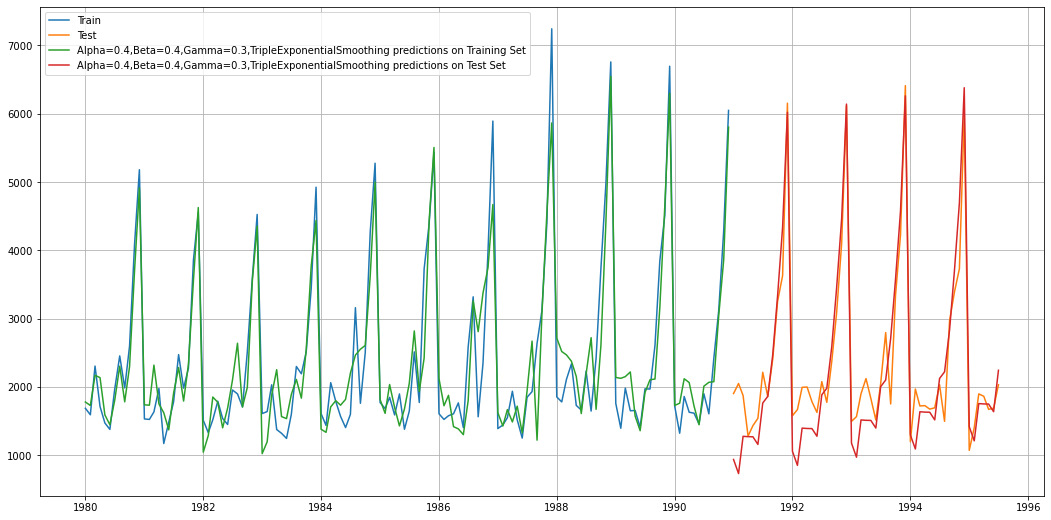

In [117]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_train['predict', 0.4, 0.4, 0.3], label='Alpha=0.4,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['predict', 0.4, 0.4, 0.3], label='Alpha=0.4,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [118]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2['Test RMSE'][72]],'Test MAPE':[resultsDf_8_2['Test MAPE'][72]]}
                           ,index=['Alpha=0.4,Beta=0.3,Gamma=0.5,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                     1389.135175      50.15
NaiveModel                                           3864.279352     152.87
SimpleAverageModel                                   1275.081804      38.90
2pointTrailingMovingAverage                           813.400684      19.70
4pointTrailingMovingAverage                          1156.589694      35.96
6pointTrailingMovingAverage                          1283.927428      43.86
9pointTrailingMovingAverage                          1346.278315      46.86
Alpha=1,SimpleExponentialSmoothing                   1275.081852      38.90
Alpha=0.3,SimpleExponentialSmoothing                 1935.507132      75.66
Alpha=0.4,SimpleExponentialSmoothing                 2311.919615      91.55
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704     675.28
Alpha=0.0862,Beta=2.067e-08,Gamma=0.4763,Triple...    362.727768      12.08
Alpha=0.4,Beta=0.3,Gamma=0.5,TripleExponentialS...    462.632920      14.73

In [119]:
print('Sorted by RMSE values on the Test Data:','\n',resultsDf.sort_values(by=['Test RMSE']),'\n','\n')
print('Sorted by MAPE values on the Test Data:','\n',resultsDf.sort_values(by=['Test MAPE']))

Sorted by RMSE values on the Test Data: 
                                                        Test RMSE  Test MAPE
Alpha=0.0862,Beta=2.067e-08,Gamma=0.4763,Triple...    362.727768      12.08
Alpha=0.4,Beta=0.3,Gamma=0.5,TripleExponentialS...    462.632920      14.73
2pointTrailingMovingAverage                           813.400684      19.70
4pointTrailingMovingAverage                          1156.589694      35.96
SimpleAverageModel                                   1275.081804      38.90
Alpha=1,SimpleExponentialSmoothing                   1275.081852      38.90
6pointTrailingMovingAverage                          1283.927428      43.86
9pointTrailingMovingAverage                          1346.278315      46.86
RegressionOnTime                                     1389.135175      50.15
Alpha=0.3,SimpleExponentialSmoothing                 1935.507132      75.66
Alpha=0.4,SimpleExponentialSmoothing                 2311.919615      91.55
NaiveModel                                    

# We see that the best model is the Triple Exponential Smoothing with additive seasonality with the parameters  𝛼  = 0.0862,  𝛽  = 2.067e-08 and  𝛾  = 0.4763.

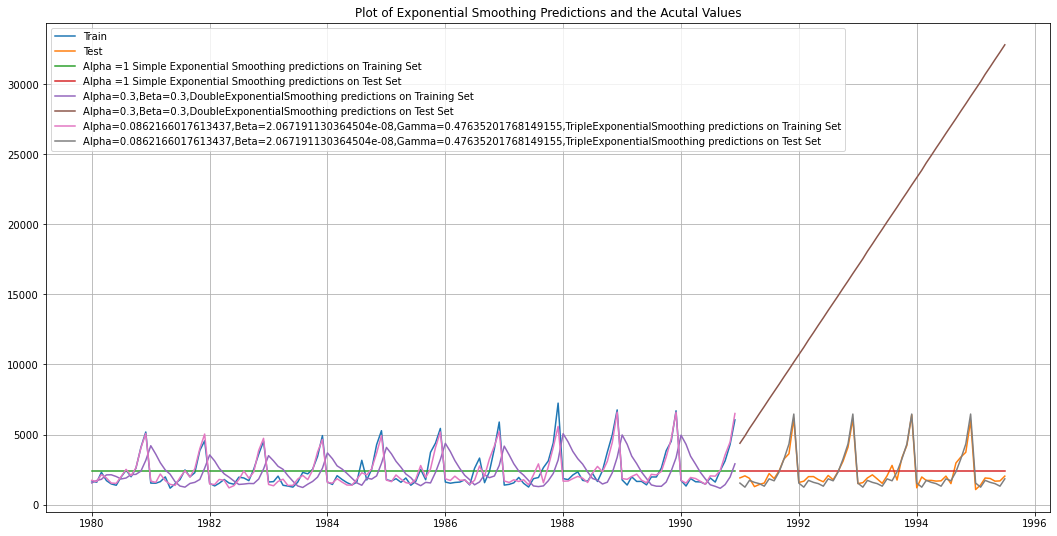

In [120]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(SES_train['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_train['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_train['auto_predict'], label='Alpha=0.0862166017613437,Beta=2.067191130364504e-08,Gamma=0.47635201768149155,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.0862166017613437,Beta=2.067191130364504e-08,Gamma=0.47635201768149155,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

# 5.Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
Note: Stationarity should be checked at alpha = 0.05.


# Check for stationarity of the whole Time Series data.

In [146]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

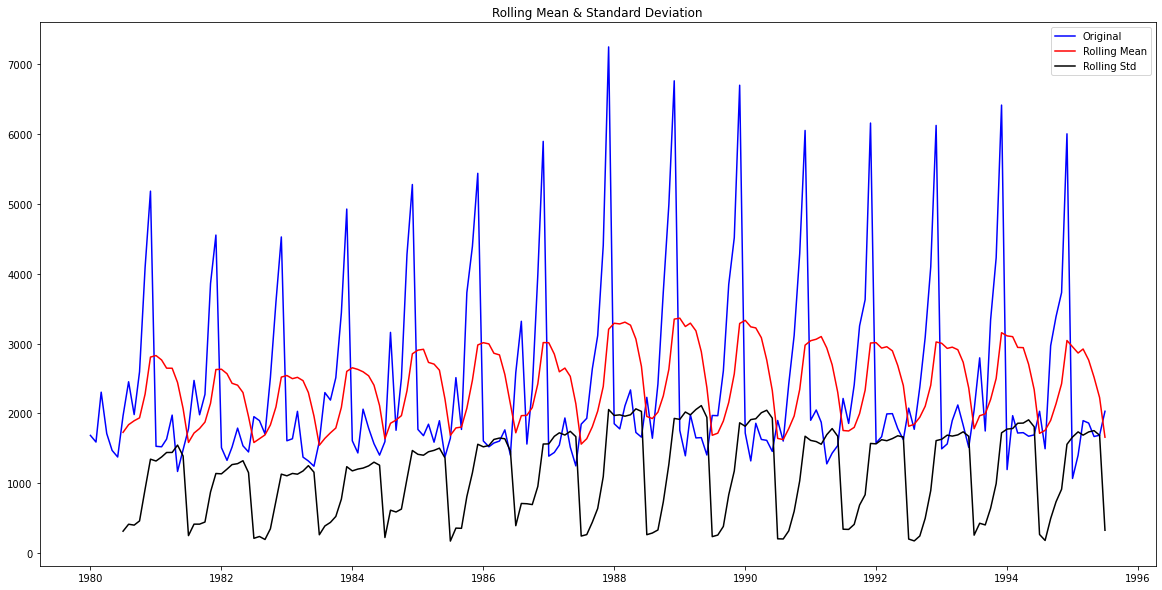

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [147]:
test_stationarity(df_spark['Sparkling'])

<b> Series is not stationary  as we have P value as 0.601061
    We see that at 5% significant level the Time Series is non-stationary
    Let us take a difference of order 1 and check whether the Time Series is stationary or not.

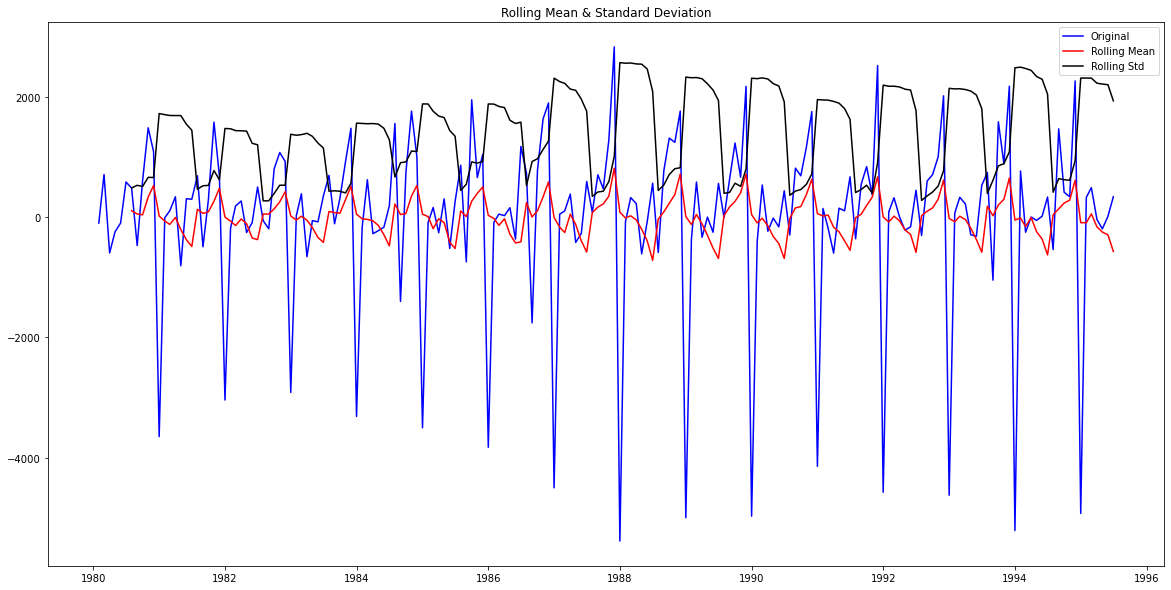

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [148]:
test_stationarity(df_spark['Sparkling'].diff().dropna())

<b>At  𝛼  = 0.05 the Time Series is stationary

# Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [149]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

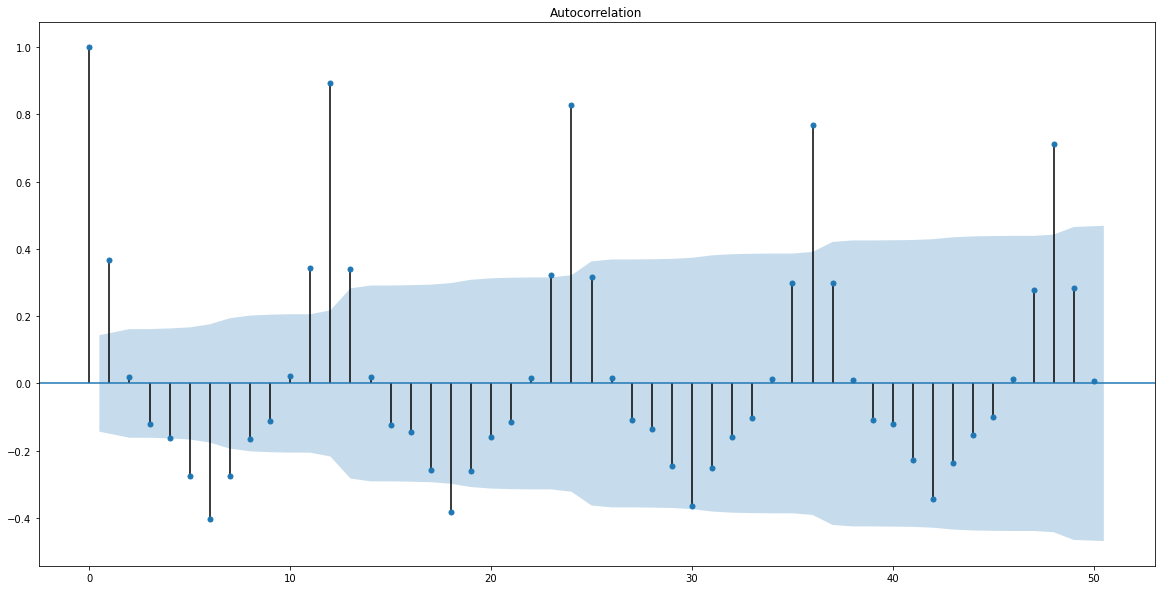

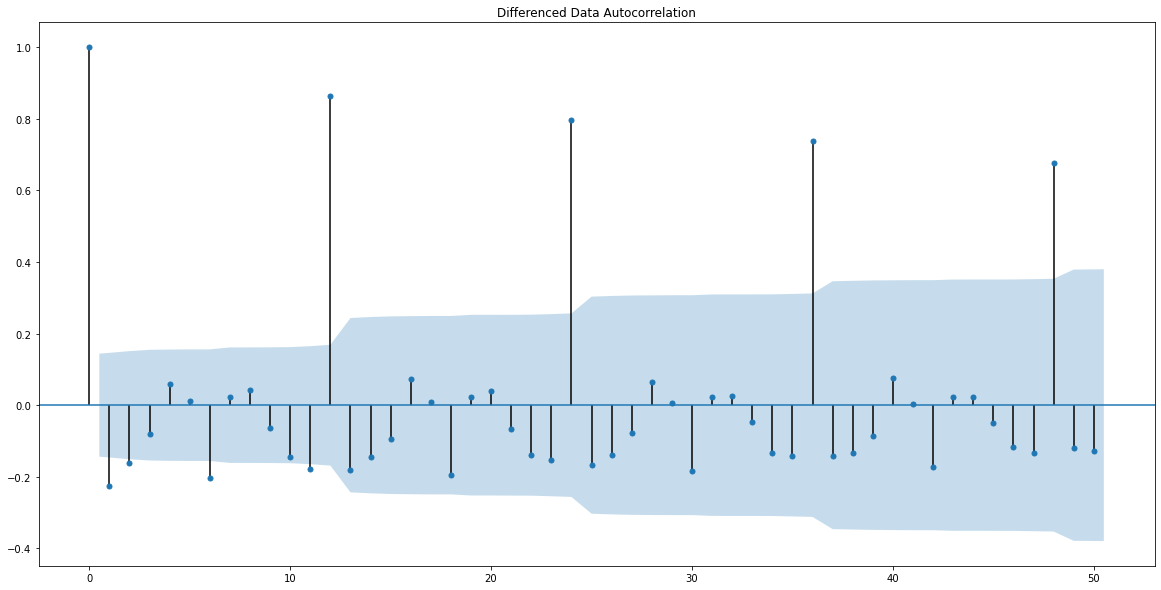

In [150]:
plot_acf(df_spark['Sparkling'],lags=50)
plot_acf(df_spark['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


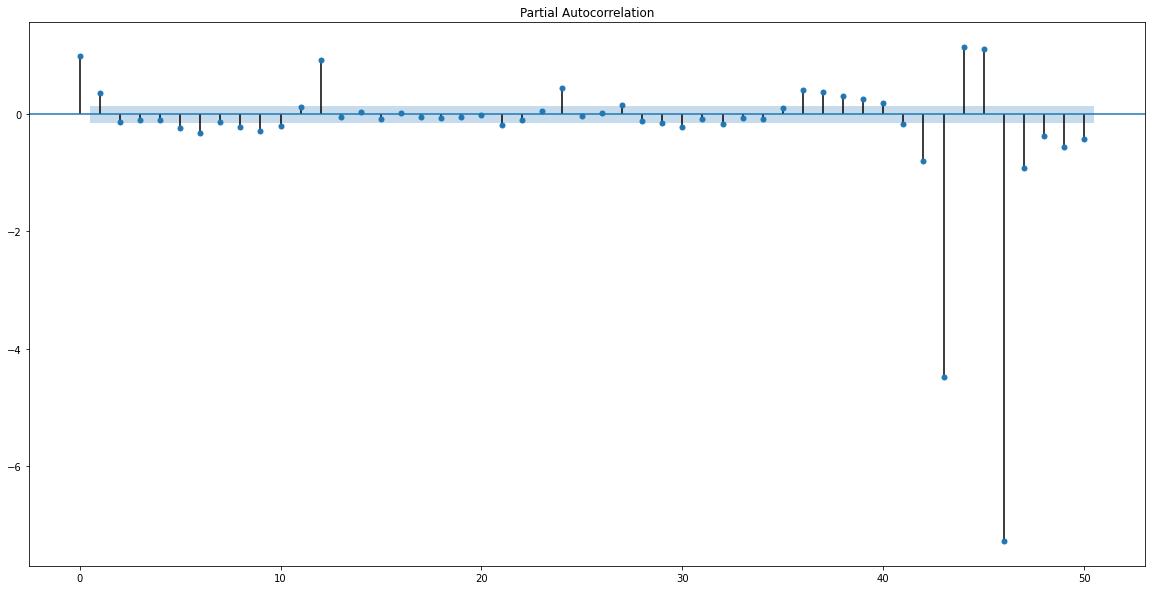

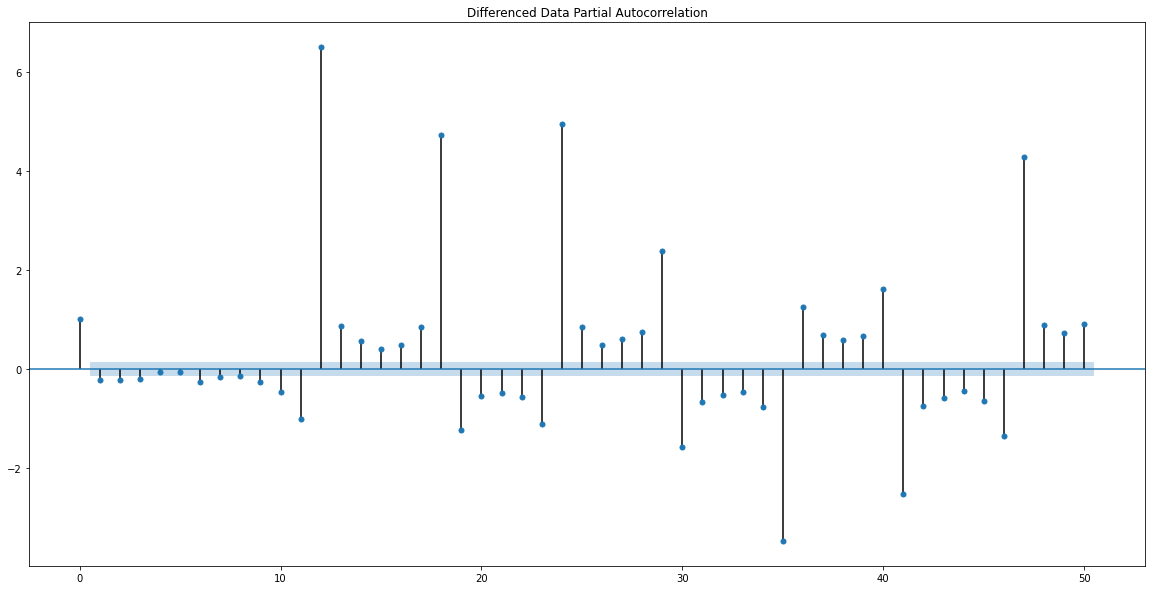

In [151]:
plot_pacf(df_spark['Sparkling'],lags=50)
plot_pacf(df_spark['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

<b>From the above plots, we can say that there seems to be a seasonality in the data.

# Split the data into train and test and plot the training and test data.

In [152]:
train=df_spark[df_spark.index.year < 1991]
test=df_spark[df_spark.index.year >= 1991]

In [153]:
display(train.head(1))
display(train.tail(1))
display(test.head(1))
display(test.tail(1))

Sparkling
YearMonth            
1980-01-01       1686

Sparkling
YearMonth            
1990-12-01       6047

Sparkling
YearMonth            
1991-01-01       1902

Sparkling
YearMonth            
1995-07-01       2031

# Check for stationarity of the Training Data Time Series

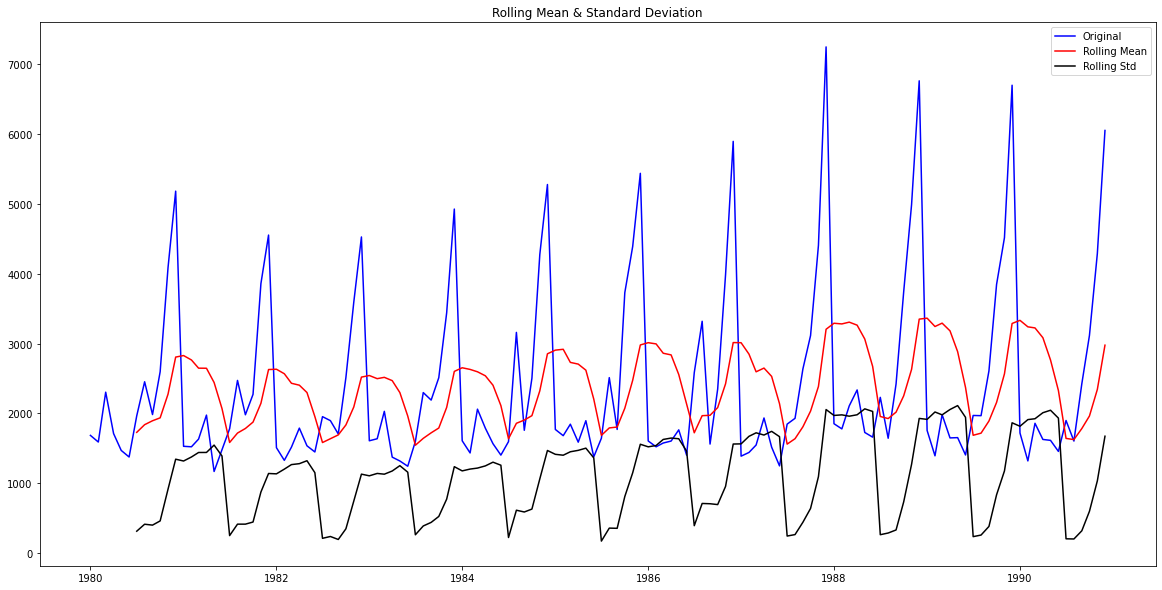

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [154]:
test_stationarity(train['Sparkling'])

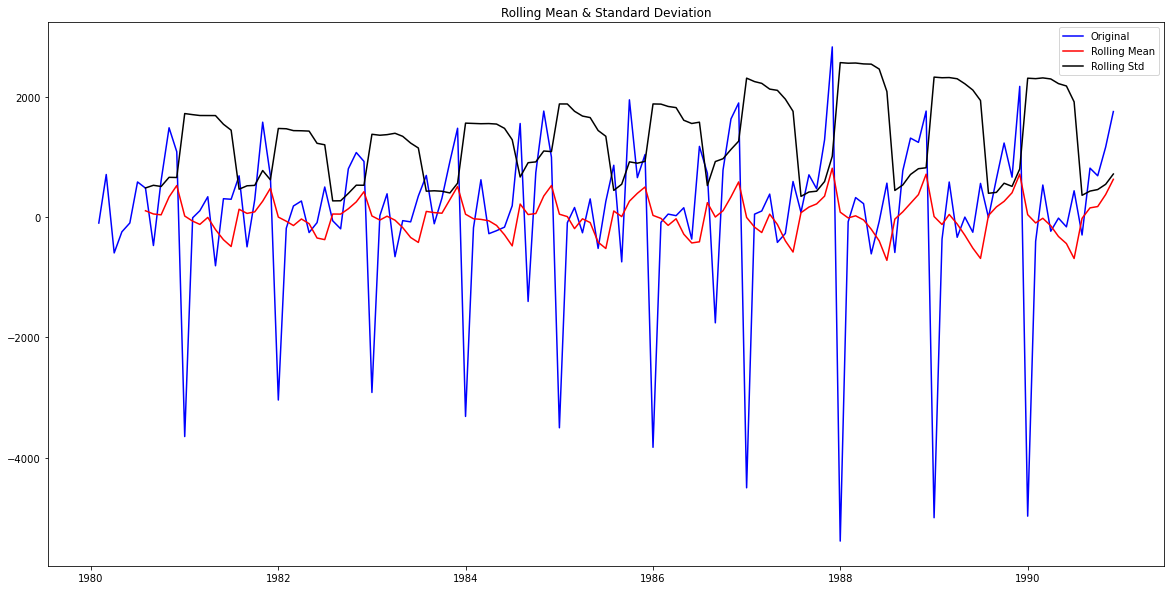

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [155]:
test_stationarity(train['Sparkling'].diff().dropna())

In [156]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


# 6.Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [157]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [158]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [159]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.9064378944936
ARIMA(0, 1, 2) - AIC:2232.7830976841105
ARIMA(1, 1, 0) - AIC:2268.528061094305
ARIMA(1, 1, 1) - AIC:2235.013945352452
ARIMA(1, 1, 2) - AIC:2233.597647122566
ARIMA(2, 1, 0) - AIC:2262.035600089642
ARIMA(2, 1, 1) - AIC:2232.360489902046
ARIMA(2, 1, 2) - AIC:2210.620206277513


C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [160]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8  (2, 1, 2)  2210.620206
7  (2, 1, 1)  2232.360490
2  (0, 1, 2)  2232.783098
5  (1, 1, 2)  2233.597647
4  (1, 1, 1)  2235.013945
6  (2, 1, 0)  2262.035600
1  (0, 1, 1)  2264.906438
3  (1, 1, 0)  2268.528061
0  (0, 1, 0)  2269.582796

In [161]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.310
Method:                       css-mle   S.D. of innovations           1013.084
Date:                Sun, 13 Sep 2020   AIC                           2210.620
Time:                        14:46:39   BIC                           2227.871
Sample:                    02-01-1980   HQIC                          2217.630
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5847      0.518     10.787      0.000       4.570       6.599
ar.L1.D.Sparkling     1.2698      0.075     17.044      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


# Predict on the Test Set using this model and evaluate the model.

In [162]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [163]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

1374.3785655980819


In [164]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])

resultsDf

RMSE
ARIMA(2,1,2)  1374.378566

# 7.	Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

# Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

In [165]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,10

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


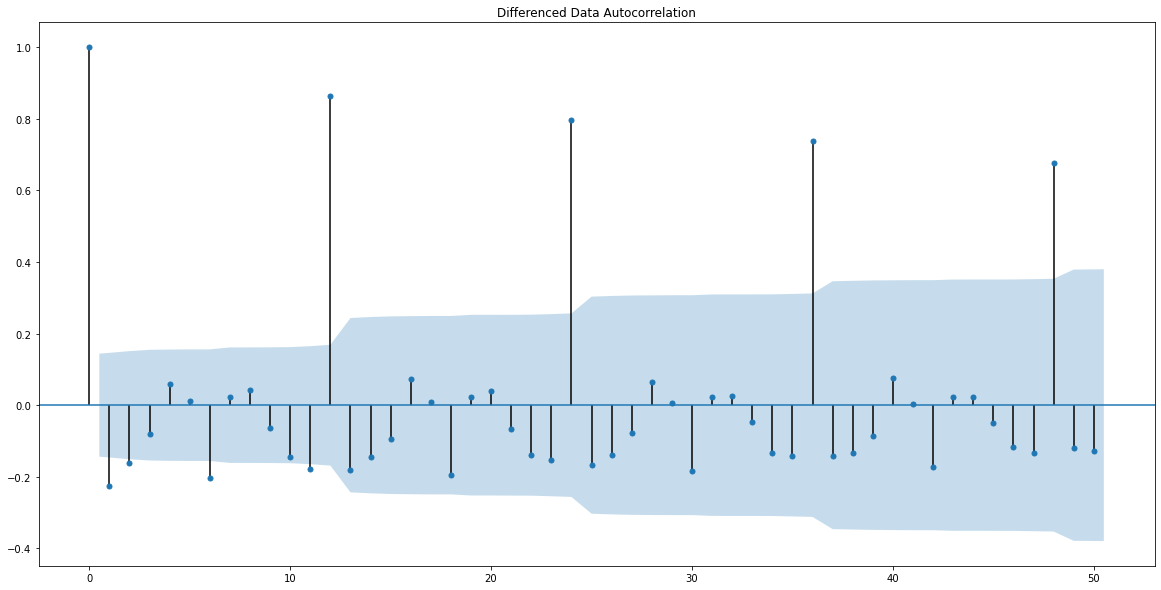

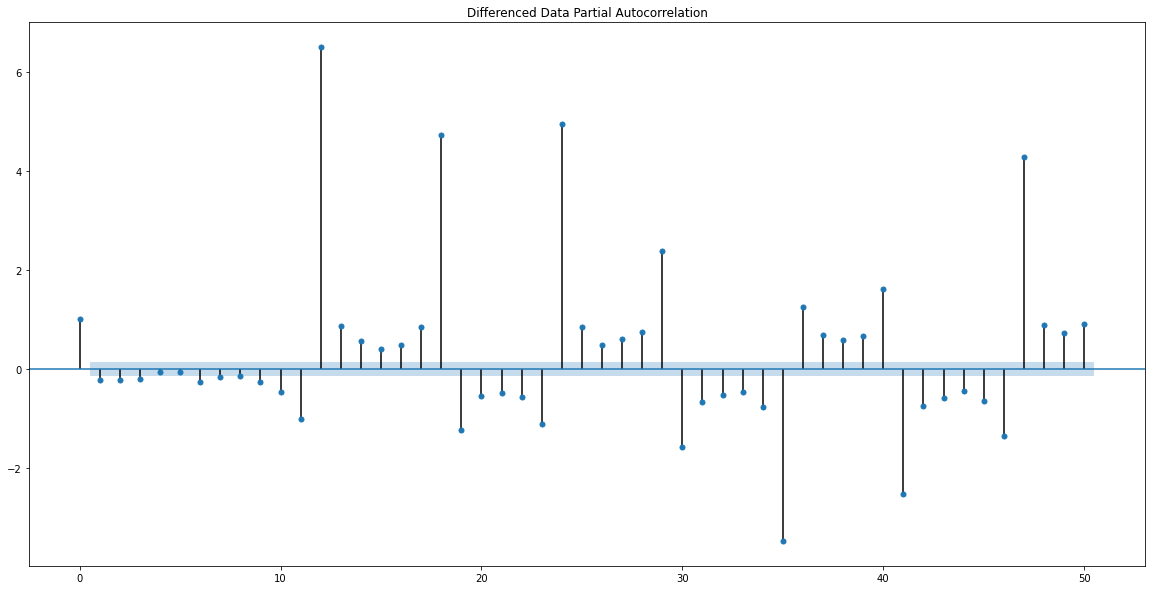

In [166]:
plot_acf(df_spark['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_spark['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [167]:
manual_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.310
Method:                       css-mle   S.D. of innovations           1013.084
Date:                Sun, 13 Sep 2020   AIC                           2210.620
Time:                        14:47:24   BIC                           2227.871
Sample:                    02-01-1980   HQIC                          2217.630
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5847      0.518     10.787      0.000       4.570       6.599
ar.L1.D.Sparkling     1.2698      0.075     17.044      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


# Predict on the Test Set using this model and evaluate the model.

In [168]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [169]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

1374.3785655980819


In [170]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['Manual ARIMA(2,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(2,1,2)         1374.378566
Manual ARIMA(2,1,2)  1374.378566

We see that the difference in RMSE values is about 2 with a much simpler model built.

# 6.Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

# Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).¶

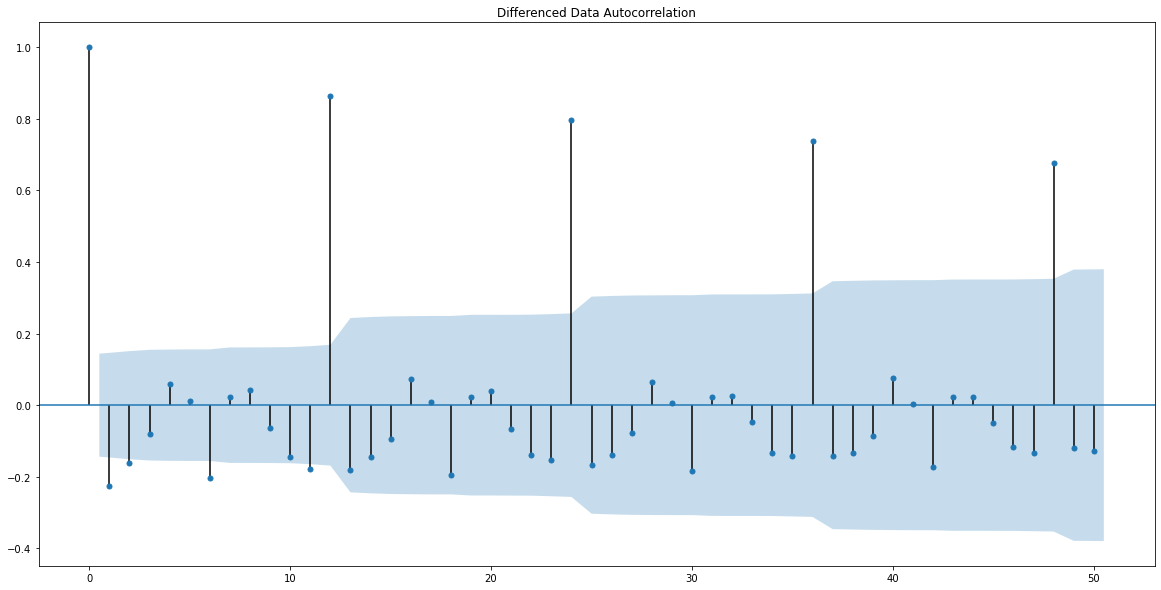

In [171]:
plot_acf(df_spark['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

# Setting the seasonality as 6 for the first iteration of the auto SARIMA model.

In [172]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [173]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [174]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6)7 - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6)7 - AIC:2152.378076171629
SARIMA(0, 1, 0)x(0, 0, 2, 6)7 - AIC:1955.6355536891797
SARIMA(0, 1, 0)x(1, 0, 0, 6)7 - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6)7 - AIC:2079.559984442963
SARIMA(0, 1, 0)x(1, 0, 2, 6)7 - AIC:1926.9360124329985
SARIMA(0, 1, 0)x(2, 0, 0, 6)7 - AIC:1839.4012986872267


C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 0)x(2, 0, 1, 6)7 - AIC:1841.1993617510627
SARIMA(0, 1, 0)x(2, 0, 2, 6)7 - AIC:1810.9177805658019
SARIMA(0, 1, 1)x(0, 0, 0, 6)7 - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 6)7 - AIC:2130.5652859082847
SARIMA(0, 1, 1)x(0, 0, 2, 6)7 - AIC:1918.187633954707
SARIMA(0, 1, 1)x(1, 0, 0, 6)7 - AIC:2139.5732428780652


C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 1)x(1, 0, 1, 6)7 - AIC:2006.5174298131365
SARIMA(0, 1, 1)x(1, 0, 2, 6)7 - AIC:1855.7093274151948
SARIMA(0, 1, 1)x(2, 0, 0, 6)7 - AIC:1798.7885104405066
SARIMA(0, 1, 1)x(2, 0, 1, 6)7 - AIC:1800.771793338896
SARIMA(0, 1, 1)x(2, 0, 2, 6)7 - AIC:1741.6473525725773
SARIMA(0, 1, 2)x(0, 0, 0, 6)7 - AIC:2187.4410101687336
SARIMA(0, 1, 2)x(0, 0, 1, 6)7 - AIC:2087.6843840215665
SARIMA(0, 1, 2)x(0, 0, 2, 6)7 - AIC:1886.1151466465724
SARIMA(0, 1, 2)x(1, 0, 0, 6)7 - AIC:2129.7395689236105
SARIMA(0, 1, 2)x(1, 0, 1, 6)7 - AIC:1988.4111271128122
SARIMA(0, 1, 2)x(1, 0, 2, 6)7 - AIC:1839.6963213871072
SARIMA(0, 1, 2)x(2, 0, 0, 6)7 - AIC:1791.6537079049833
SARIMA(0, 1, 2)x(2, 0, 1, 6)7 - AIC:1793.6191012202316
SARIMA(0, 1, 2)x(2, 0, 2, 6)7 - AIC:1727.8888323230153
SARIMA(1, 1, 0)x(0, 0, 0, 6)7 - AIC:2250.3181267386713
SARIMA(1, 1, 0)x(0, 0, 1, 6)7 - AIC:2151.0782683084253
SARIMA(1, 1, 0)x(0, 0, 2, 6)7 - AIC:1953.3652245475485
SARIMA(1, 1, 0)x(1, 0, 0, 6)7 - AIC:2146.1836648562166
SARIMA(1, 1

In [175]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
26  (0, 1, 2)  (2, 0, 2, 6)  1727.888832
80  (2, 1, 2)  (2, 0, 2, 6)  1729.363555
53  (1, 1, 2)  (2, 0, 2, 6)  1730.103380
17  (0, 1, 1)  (2, 0, 2, 6)  1741.647353
44  (1, 1, 1)  (2, 0, 2, 6)  1743.330546

In [176]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -856.944
Date:                           Sun, 13 Sep 2020   AIC                           1727.889
Time:                                   14:52:23   BIC                           1747.164
Sample:                                        0   HQIC                          1735.713
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7852      0.103     -7.650      0.000      -0.986      -0.584
ma.L2         -0.0976      0.112     -0.870

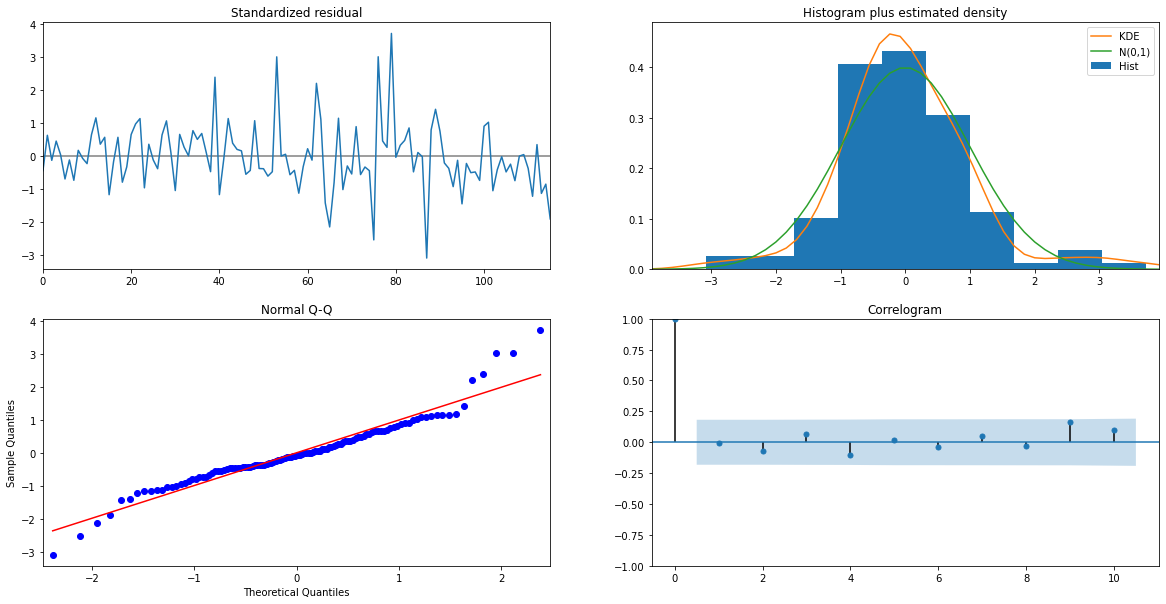

In [177]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

# Predict on the Test Set using this model and evaluate the model.

In [178]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [179]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1375.800174  384.199684     622.782630    2128.817718
1  1116.918050  392.967017     346.716849    1887.119250
2  1667.778672  395.538274     892.537901    2443.019443
3  1528.497065  398.096022     748.243200    2308.750930
4  1372.336265  400.637496     587.101203    2157.571327

In [180]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

601.0568883180906


In [181]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(2,1,2)            1374.378566
Manual ARIMA(2,1,2)     1374.378566
SARIMA(0,1,2)(2,0,2,6)   601.056888

# Setting the seasonality as 12 for the first iteration of the auto SARIMA model.

In [182]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [183]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [184]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:1956.2614616844949
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:1723.1533640235227
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:1837.4366022456677
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:1806.99053013902
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:1633.2108735792467
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:1647.205415859824
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:1630.9898053920742
SARIMA(0, 1, 1)x(0, 0, 0, 12)7 - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 12)7 - AIC:1923.7688649566255
SARIMA(0, 1, 1)x(0, 0, 2, 12)7 - AIC:1692.7089572838088
SARIMA(0, 1, 1)x(1, 0, 0, 12)7 - AIC:1797.1795881838405
SARIMA(0, 1, 1)x(1, 0, 1, 12)7 - AIC:1738.0903193787221
SARIMA(0, 1, 1)x(1, 0, 2, 12)7 - AIC:1570.1509144396211
SARIMA(0, 1, 1)x(2, 0, 0, 12)7 - AIC:1605.6751954181343
SARIMA(0, 1, 1)x(2, 0, 1, 12)7 - AIC:1599.2245085372258
SARIMA(0, 1, 1)x(2, 0, 2, 12)7 - AIC:1570.4018823408

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 1)x(1, 0, 1, 12)7 - AIC:1740.0911247066433
SARIMA(2, 1, 1)x(1, 0, 2, 12)7 - AIC:1571.9888295267797
SARIMA(2, 1, 1)x(2, 0, 0, 12)7 - AIC:1577.1235061210175
SARIMA(2, 1, 1)x(2, 0, 1, 12)7 - AIC:1573.159584924978
SARIMA(2, 1, 1)x(2, 0, 2, 12)7 - AIC:1572.3428636064807
SARIMA(2, 1, 2)x(0, 0, 0, 12)7 - AIC:2176.8681143892527
SARIMA(2, 1, 2)x(0, 0, 1, 12)7 - AIC:1892.2372632439735
SARIMA(2, 1, 2)x(0, 0, 2, 12)7 - AIC:1661.5523433639855
SARIMA(2, 1, 2)x(1, 0, 0, 12)7 - AIC:1757.2140931427857
SARIMA(2, 1, 2)x(1, 0, 1, 12)7 - AIC:1725.395564296782
SARIMA(2, 1, 2)x(1, 0, 2, 12)7 - AIC:1557.3404053966167
SARIMA(2, 1, 2)x(2, 0, 0, 12)7 - AIC:1625.2275551273033
SARIMA(2, 1, 2)x(2, 0, 1, 12)7 - AIC:1573.5476035318661
SARIMA(2, 1, 2)x(2, 0, 2, 12)7 - AIC:1557.8401270973513


In [185]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
50  (1, 1, 2)  (1, 0, 2, 12)  1555.584247
53  (1, 1, 2)  (2, 0, 2, 12)  1555.934566
26  (0, 1, 2)  (2, 0, 2, 12)  1557.121563
23  (0, 1, 2)  (1, 0, 2, 12)  1557.160507
77  (2, 1, 2)  (1, 0, 2, 12)  1557.340405

In [186]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sun, 13 Sep 2020   AIC                           1555.584
Time:                                    14:58:18   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6282      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

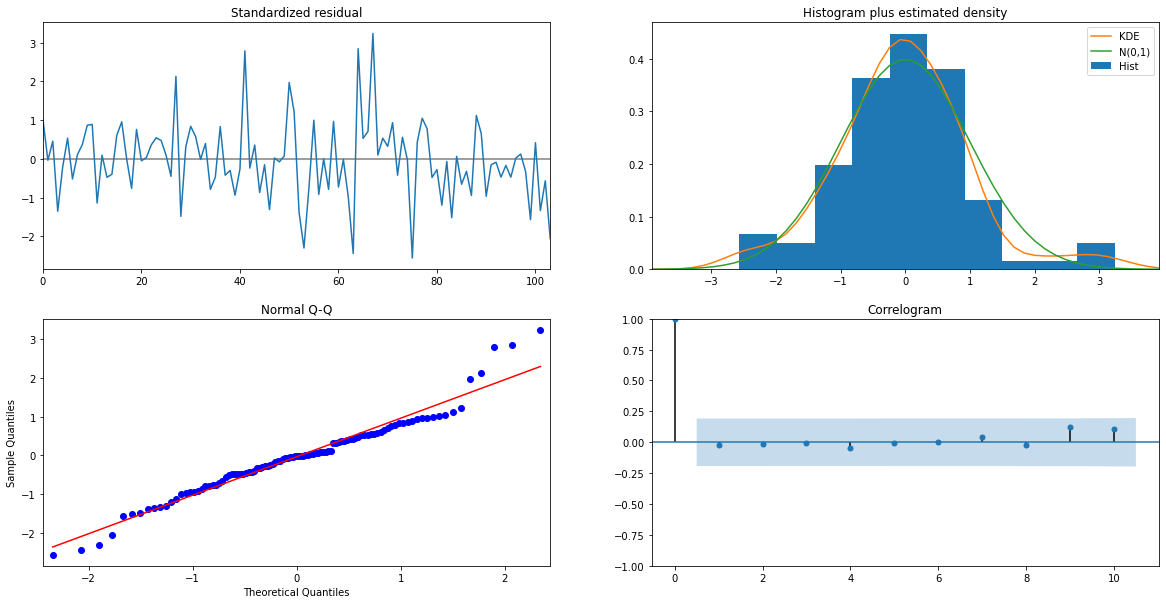

In [187]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

# Predict on the Test Set using this model and evaluate the model.

In [188]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [189]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1327.377998  388.343500     566.238725    2088.517272
1  1315.096677  402.006210     527.178984    2103.014370
2  1621.576662  401.999818     833.671498    2409.481827
3  1598.855762  407.237720     800.684497    2397.027027
4  1392.675235  407.967867     593.072908    2192.277561

In [190]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

528.6352376191854


In [191]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(1, 0, 2, 12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(2,1,2)                1374.378566
Manual ARIMA(2,1,2)         1374.378566
SARIMA(0,1,2)(2,0,2,6)       601.056888
SARIMA(1,1,2)(1, 0, 2, 12)   528.635238

# 7.Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


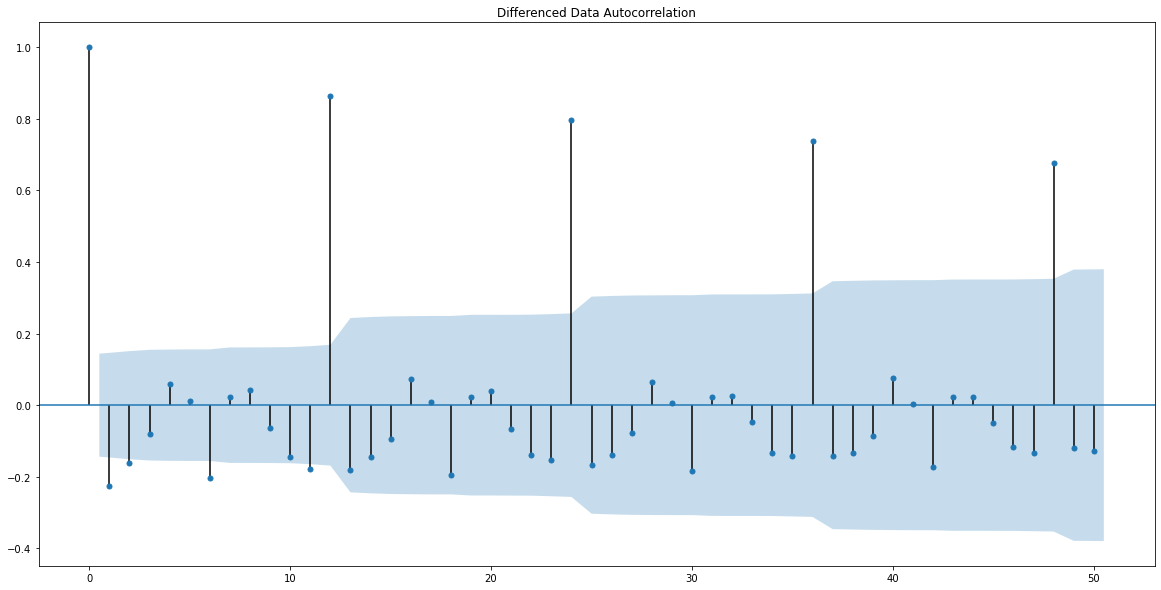

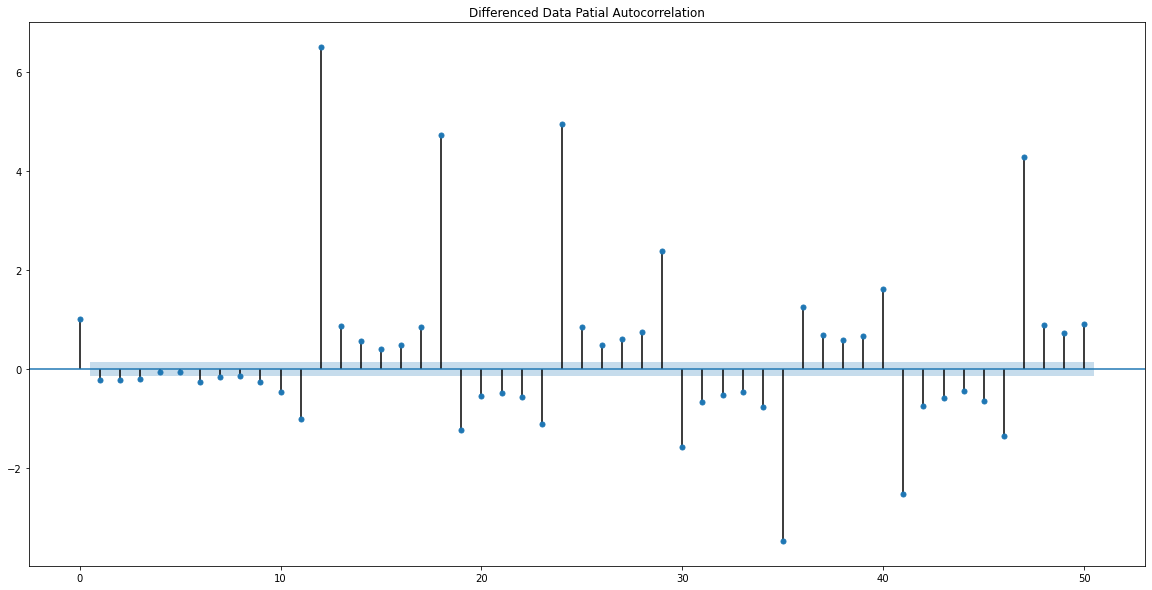

In [192]:
plot_acf(df_spark['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_spark['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

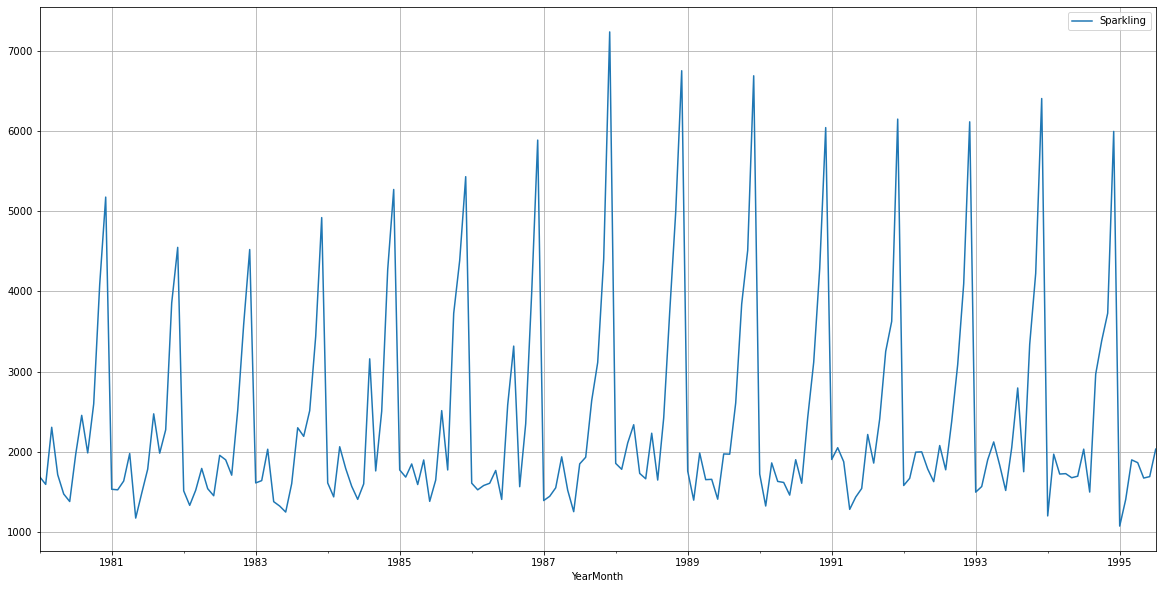

In [193]:
df_spark.plot()
plt.grid();

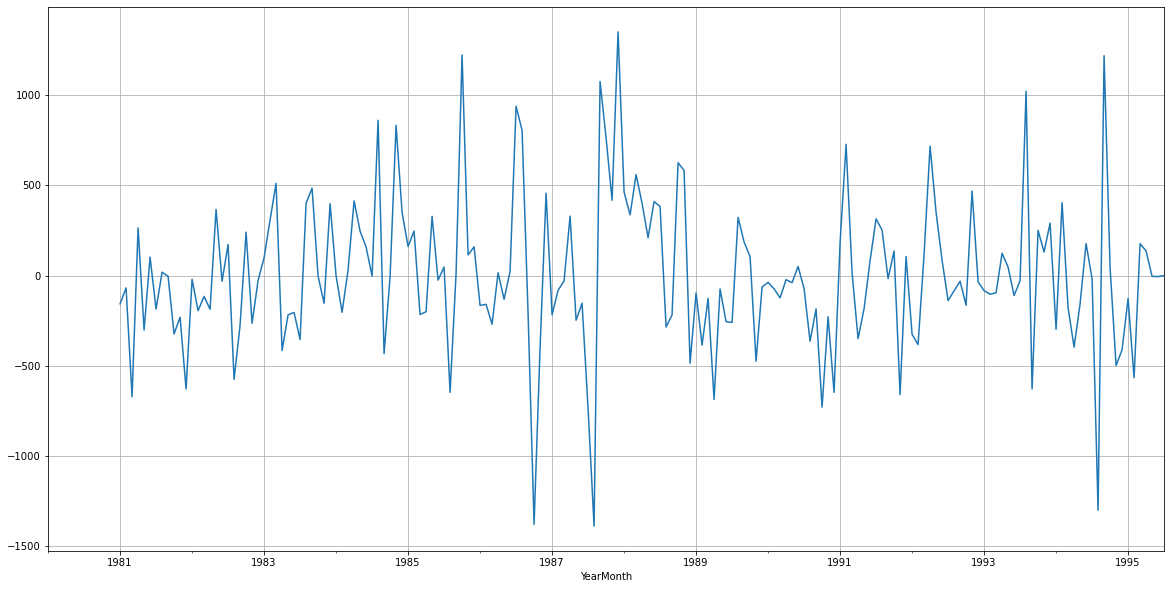

In [194]:
(df_spark['Sparkling'].diff(12)).plot()
plt.grid();

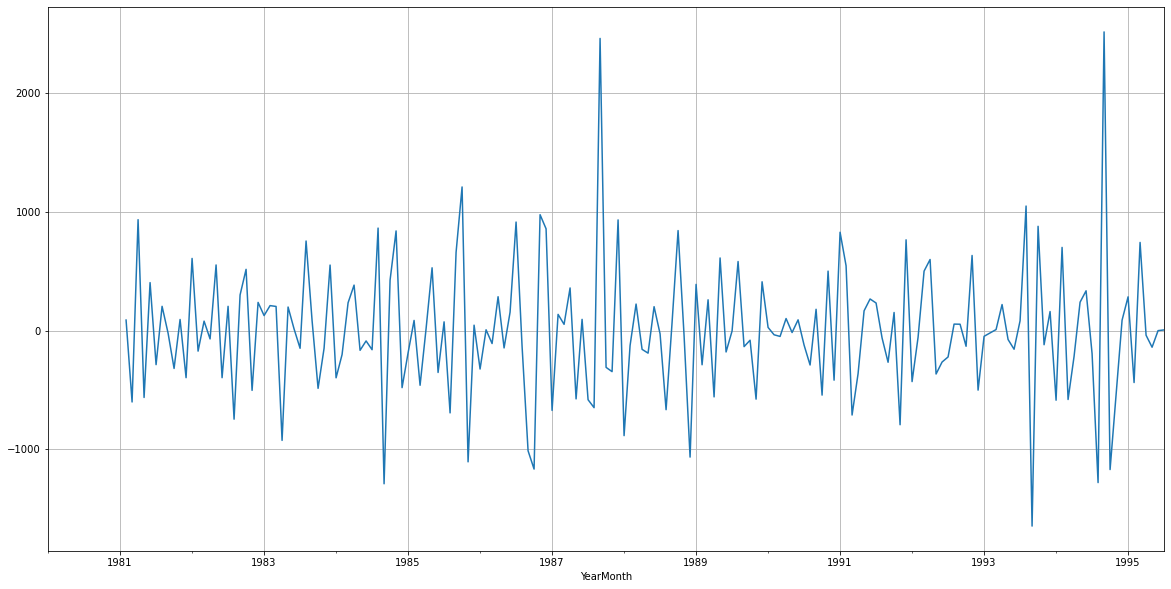

In [195]:
(df_spark['Sparkling'].diff(12)).diff().plot()
plt.grid();

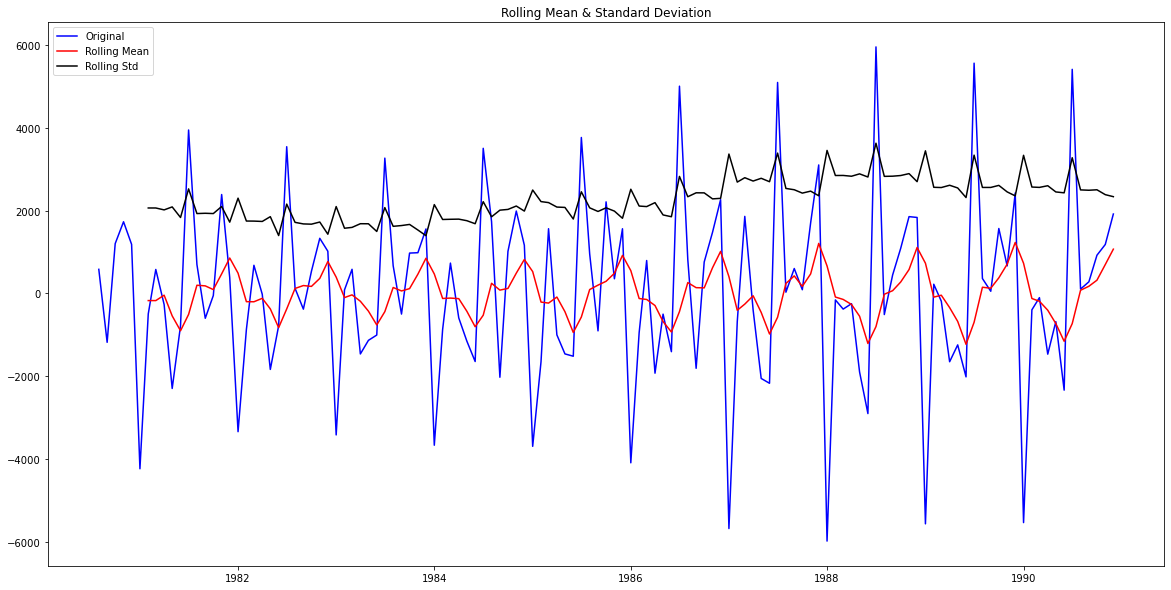

Results of Dickey-Fuller Test:
Test Statistic                -7.017242e+00
p-value                        6.683657e-10
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64 



In [196]:
test_stationarity((train['Sparkling'].diff(6).dropna()).diff(1).dropna())

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


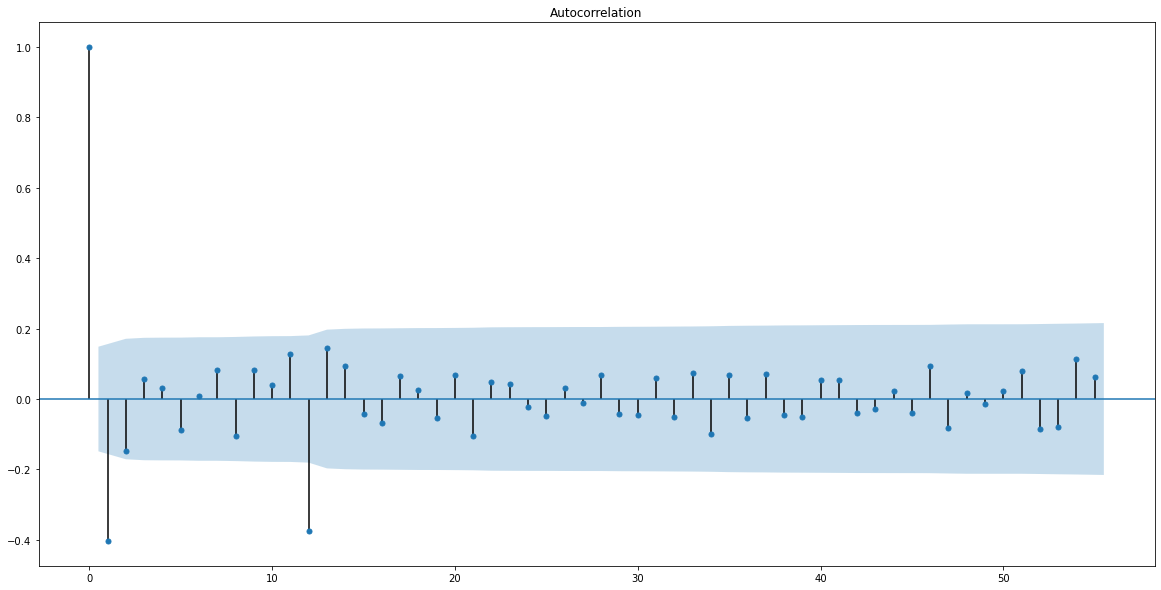

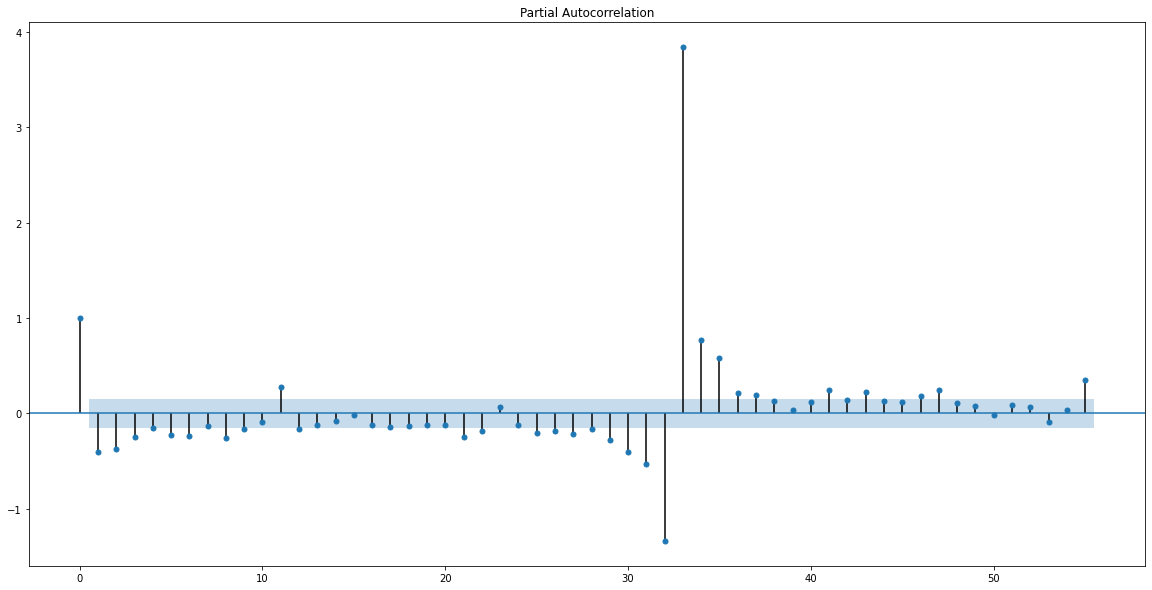

In [197]:
plot_acf((df_spark['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=55)
plot_pacf((df_spark['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=55);

In [198]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -694.226
Date:                                 Sun, 13 Sep 2020   AIC                           1400.452
Time:                                         14:59:05   BIC                           1415.648
Sample:                                              0   HQIC                          1406.588
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1906      0.132      1.439      0.150      -0.069       0

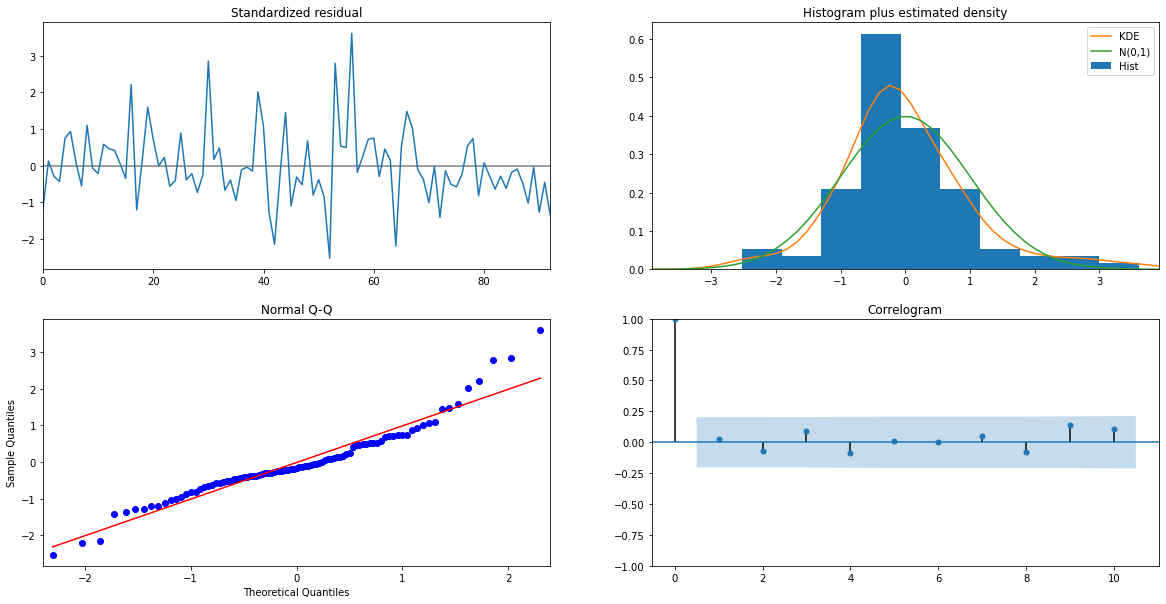

In [199]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

# Predict on the Test Set using this model and evaluate the model.

In [200]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [201]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1598.719661  419.562780     776.391723    2421.047599
1  1378.184904  430.345647     534.722936    2221.646872
2  1877.394510  431.685535    1031.306409    2723.482611
3  1722.843232  432.256072     875.636899    2570.049564
4  1627.627099  432.716337     779.518663    2475.735536

In [202]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

323.2108301936859


In [203]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['Manual SARIMA(1,1,1)(1, 1, 2, 12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(2,1,2)                       1374.378566
Manual ARIMA(2,1,2)                1374.378566
SARIMA(0,1,2)(2,0,2,6)              601.056888
SARIMA(1,1,2)(1, 0, 2, 12)          528.635238
Manual SARIMA(1,1,1)(1, 1, 2, 12)   323.210830

# 8.	Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

# ARIMA and SARIMA All model RMSE values

In [204]:
resultsDf

RMSE
ARIMA(2,1,2)                       1374.378566
Manual ARIMA(2,1,2)                1374.378566
SARIMA(0,1,2)(2,0,2,6)              601.056888
SARIMA(1,1,2)(1, 0, 2, 12)          528.635238
Manual SARIMA(1,1,1)(1, 1, 2, 12)   323.210830

# 9.	Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

# Building the most optimum model on the Full Data based on SARIMA Model which is having less RMSE value

In [205]:
full_data_model = sm.tsa.statespace.SARIMAX(df_spark['Sparkling'],
                                order=(1,1,1),
                                seasonal_order=(1,1,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                        SARIMAX Results                                        
Dep. Variable:                               Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood               -1094.755
Date:                                 Sun, 13 Sep 2020   AIC                           2201.510
Time:                                         15:00:22   BIC                           2219.493
Sample:                                     01-01-1980   HQIC                          2208.816
                                          - 07-01-1995                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1076      0.086      1.256      0.209      -0.060       0

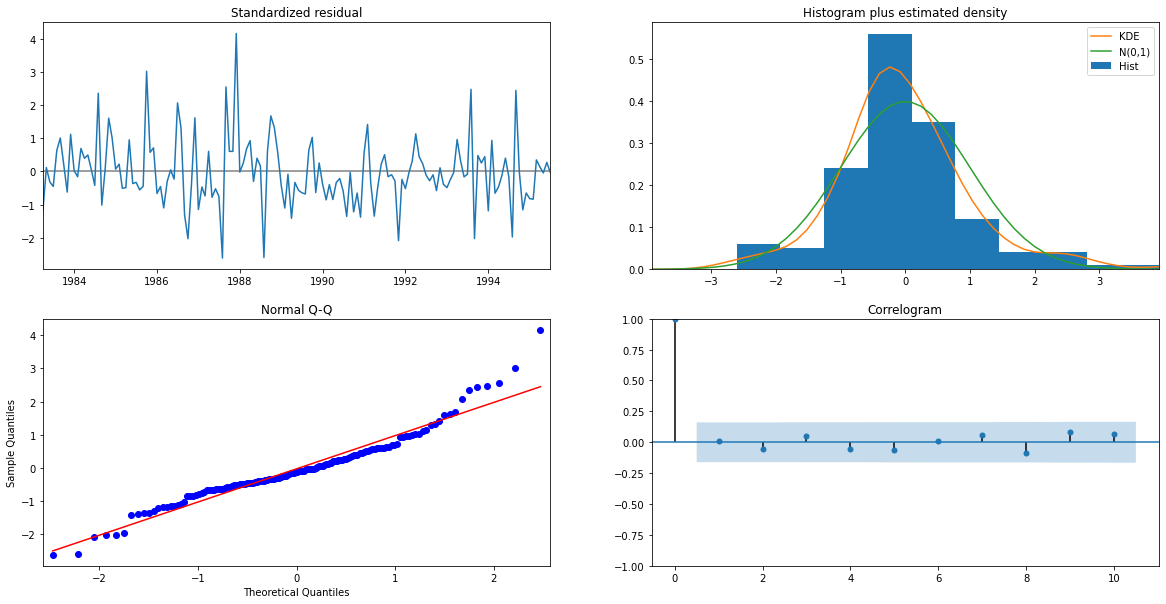

In [206]:
results_full_data_model.plot_diagnostics();

# Evaluate the model on the whole and predict 12 months into the future (till the end of next year).

In [207]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [208]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  1881.458148  391.839784    1113.466284    2649.450012
1995-09-01  2482.551743  395.733925    1706.927504    3258.175983
1995-10-01  3298.533072  396.198035    2521.999192    4075.066951
1995-11-01  3940.052979  396.492357    3162.942238    4717.163720
1995-12-01  6138.520464  396.770539    5360.864497    6916.176430

In [209]:
rmse = mean_squared_error(df_spark['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 546.2796660075071


In [210]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1996-07-01', freq='MS'))

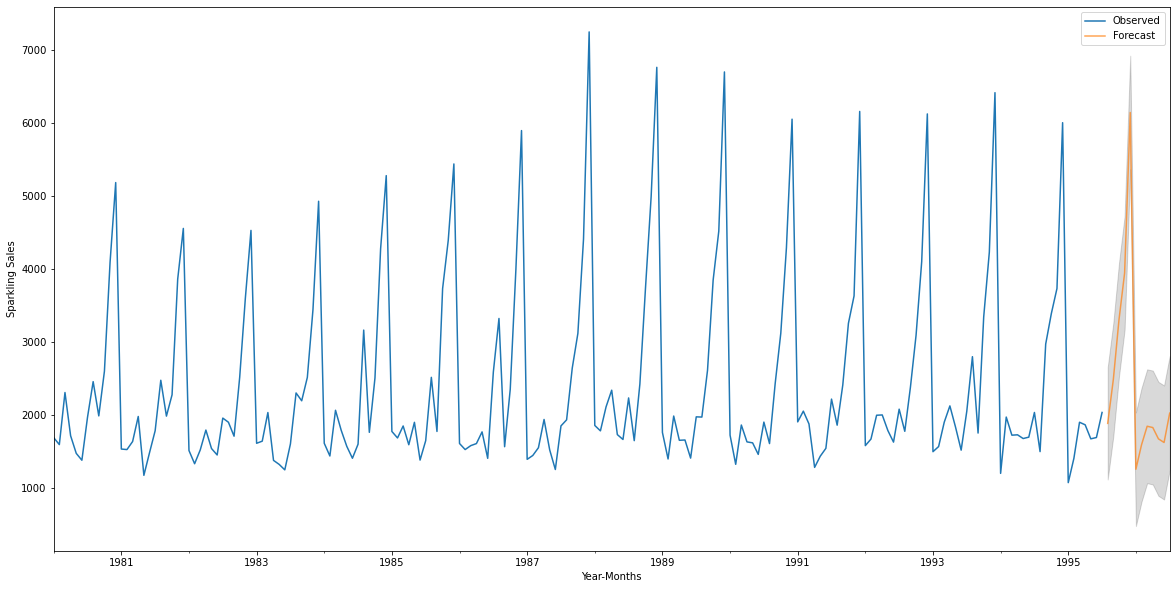

In [211]:
# plot the forecast along with the confidence band

axis = df_spark['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling Sales')
plt.legend(loc='best')
plt.show()

In [212]:
pred_full_manual_SARIMA_date

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  1881.458148  391.839784    1113.466284    2649.450012
1995-09-01  2482.551743  395.733925    1706.927504    3258.175983
1995-10-01  3298.533072  396.198035    2521.999192    4075.066951
1995-11-01  3940.052979  396.492357    3162.942238    4717.163720
1995-12-01  6138.520464  396.770539    5360.864497    6916.176430
1996-01-01  1253.280775  397.046847     475.083255    2031.478295
1996-02-01  1587.387253  397.322841     808.648795    2366.125711
1996-03-01  1842.312647  397.598563    1063.033782    2621.591511
1996-04-01  1824.506848  397.874087    1044.687968    2604.325729
1996-05-01  1669.851923  398.149419     889.493402    2450.210443
1996-06-01  1619.739238  398.424560     838.841450    2400.637027
1996-07-01  2022.034370  398.699512    1240.597686    2803.471054

In [213]:
resultsDf

RMSE
ARIMA(2,1,2)                       1374.378566
Manual ARIMA(2,1,2)                1374.378566
SARIMA(0,1,2)(2,0,2,6)              601.056888
SARIMA(1,1,2)(1, 0, 2, 12)          528.635238
Manual SARIMA(1,1,1)(1, 1, 2, 12)   323.210830